In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import time
import requests
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from time import time, sleep
from tqdm import tqdm
import matplotlib.pyplot as plt

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException




# Part1: Data Cleaning, EDA and Preliminary Analysis




In [2]:
import glob

path = r'' # use your path
all_files = glob.glob(path + "*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [3]:
frame

Unnamed: 0                                               name  \
0               0  Fattoria Giuseppe Savini 2017 Rondineto (Monte...   
1               1  Feudo Antico 2017 Organic (Montepulciano d'Abr...   
2               2  Illuminati 2017 Lumeggio di Rosso (Montepulcia...   
3               3  Nicodemi 2016 Le Murate (Montepulciano d'Abruz...   
4               4  Testa 2017 Family Selection (Montepulciano d'A...   
...           ...                                                ...   
42451         330                   Ciabot Berton 2014 1961 (Barolo)   
42452         331                                 Azelia 2015 Barolo   
42453         332                                  Coppo 2015 Barolo   
42454         333              L'Astemia Pentita 2015 Terlo (Barolo)   
42455         334         Monchiero 2013 Montanello Riserva (Barolo)   

                                                  review              taster  \
0      Ripe cherry and wild berry aromas take on a bi...  ALEXANDER PEARTREE   
1      Spiced raspberry and cherry meld with a bit of...  ALEXANDER PEARTREE   
2      Cherry, plum and tobacco aromas carry to the m...  ALEXANDER PEARTREE   
3      A rather reductive nose carries a rubber aroma...  ALEXANDER PEARTREE   
4      A rather reserved nose of green tobacco leaf a...  ALEXANDER PEARTREE   
...                                                  ...                 ...   
42451  Aromas of red berries, cooking spices and unde...       KERIN O’KEEFE   
42452  This has intense aromas of iris and violet wit...       KERIN O’KEEFE   
42453  Scorched earth, baking spice and red berry aro...       KERIN O’KEEFE   
42454  Fragrant blue flower, red berry and eucalyptus...       KERIN O’KEEFE   
42455  Dark berry, tobacco and balsamic aromas emerge...       KERIN O’KEEFE   

       rating         price         designation                     variety  \
0          86   $12,BUY NOW           Rondineto  Montepulciano, Italian Red   
1          86   $10,BUY NOW             Organic  Montepulciano, Italian Red   
2          86   $18,BUY NOW   Lumeggio di Rosso  Montepulciano, Italian Red   
3          86   $15,BUY NOW           Le Murate  Montepulciano, Italian Red   
4          86   $15,BUY NOW    Family Selection  Montepulciano, Italian Red   
...       ...           ...                 ...                         ...   
42451      90   $53,BUY NOW                1961                    Nebbiolo   
42452      90   $50,BUY NOW                 NaN                    Nebbiolo   
42453      90   $85,BUY NOW                 NaN                    Nebbiolo   
42454      90  $100,BUY NOW               Terlo                    Nebbiolo   
42455      90   $65,BUY NOW  Montanello Riserva                    Nebbiolo   

                                             appellation  \
0          Montepulciano d'Abruzzo, Central Italy, Italy   
1          Montepulciano d'Abruzzo, Central Italy, Italy   
2          Montepulciano d'Abruzzo, Central Italy, Italy   
3      Montepulciano d'Abruzzo Colline Teramane, Cent...   
4          Montepulciano d'Abruzzo, Central Italy, Italy   
...                                                  ...   
42451                            Barolo, Piedmont, Italy   
42452                            Barolo, Piedmont, Italy   
42453                            Barolo, Piedmont, Italy   
42454                            Barolo, Piedmont, Italy   
42455                            Barolo, Piedmont, Italy   

                         winery    alc bottle_size category  \
0      Fattoria Giuseppe Savini    13%      750 ml      Red   
1                  Feudo Antico    13%      750 ml      Red   
2                    Illuminati  13.5%      750 ml      Red   
3                      Nicodemi    13%      750 ml      Red   
4                         Testa    13%      750 ml      Red   
...                         ...    ...         ...      ...   
42451             Ciabot Berton  14.5%      750 ml      Red   
42452  

In [4]:
eda= frame.iloc[:,1::]

In [5]:
df_duplicates = eda[eda.duplicated(subset='name')]
len(df_duplicates)

1215

In [6]:
eda1 = eda.drop_duplicates(subset='name',keep='first',inplace=False)
eda.shape

(42456, 14)

In [7]:
df=eda1.copy()

In [8]:
df['alc'] = df['alc'].map(
    lambda x: float(str(x).replace('%', '')))

In [9]:
df['price'] = df['price'].map(
    lambda x: str(x).replace('$', '').replace(',BUY NOW', ''))

In [10]:
df['price'] = df['price'].map(
    lambda x: str(x).replace('N/A,','N/A'))

In [11]:
df['price'].unique()

array(['12', '10', '18', '15', 'N/A', '13', '32', '30', '9', '25', '50',
       '19', '20', '16', '14', '28', '17', '8', '35', '40', '70', '60',
       '66', '116', '38', '36', '85', '45', '95', '57', '55', '48', '68',
       '26', '65', '23', '22', '29', '24', '62', '37', '46', '33', '34',
       '49', '90', '21', '42', '99', '27', '39', '20,', '58', '11', '59',
       '300', '120', '67', '61', '73', '31', '94', '80', '1100', '215',
       '110', '145', '79', '250', '140', '100', '150', '135', '105', '77',
       '41', '92', '75', '74', '220', '118', '97', '43', '69', '200',
       '89', '47', '52', '130', '224', '190', '165', '155', '147', '133',
       '280', '125', '115', '70,', '72', '113', '225', '25,', '112',
       '170', '64', '21,', '44', '13.50', '7', '325', '152', '180', '35,',
       '98', '53', '343', '84', '45,', '246', '340', '160', '96', '124',
       '63', '54', '76', '56', '88', '406,', '143', '78', '87', '270',
       '485', '195', '213', '134', '249', '71', '146', 

In [12]:
df.variety.str.split(",", n = 1, expand = True) 


0               1
0      Montepulciano     Italian Red
1      Montepulciano     Italian Red
2      Montepulciano     Italian Red
3      Montepulciano     Italian Red
4      Montepulciano     Italian Red
...              ...             ...
42436       Nebbiolo            None
42437       Malvasia   Italian White
42438       Nebbiolo            None
42439       Nebbiolo            None
42440        Cortese   Italian White

[41241 rows x 2 columns]

In [13]:
df["variety1"]= df.variety.str.split(",", n = 1, expand = True) [0] 
df["variety2"]= df.variety.str.split(",", n = 1, expand = True) [1] 

In [14]:
df['appellation1'] = df.appellation.str.split(",", n = 2, expand = True)[0]
df['region']= df.appellation.str.split(",", n = 2, expand = True)[1]
df['nation']= df.appellation.str.split(",", n = 2, expand = True)[2]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41241 entries, 0 to 42440
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41241 non-null  object 
 1   review        41213 non-null  object 
 2   taster        24021 non-null  object 
 3   rating        41241 non-null  int64  
 4   price         41241 non-null  object 
 5   designation   29221 non-null  object 
 6   variety       41241 non-null  object 
 7   appellation   41241 non-null  object 
 8   winery        41241 non-null  object 
 9   alc           37620 non-null  float64
 10  bottle_size   41241 non-null  object 
 11  category      41241 non-null  object 
 12  importer      41241 non-null  object 
 13  review_date   41241 non-null  object 
 14  variety1      41241 non-null  object 
 15  variety2      23417 non-null  object 
 16  appellation1  41241 non-null  object 
 17  region        41241 non-null  object 
 18  nation        41218 non-nu

In [16]:
df.name[0]

"Fattoria Giuseppe Savini 2017 Rondineto (Montepulciano d'Abruzzo)"

In [17]:
df.price.unique().min()

'10'

In [18]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')


In [19]:
df['price'] = df['price'].replace('', np.nan)
eda.price.isnull().value_counts()

False    42456
Name: price, dtype: int64

In [20]:
df['vintage'] = df['name'].str.extract(r"(\d{4})").astype(float)

In [1]:
#selecting only vintages between 1971 and 2020

In [22]:
df1= df[(df['vintage'] >1970) & (df['vintage'] < 2021)]
df1= df1.reset_index(drop=True)

In [23]:
df1.head()

name  \
0  Fattoria Giuseppe Savini 2017 Rondineto (Monte...   
1  Feudo Antico 2017 Organic (Montepulciano d'Abr...   
2  Illuminati 2017 Lumeggio di Rosso (Montepulcia...   
3  Nicodemi 2016 Le Murate (Montepulciano d'Abruz...   
4  Testa 2017 Family Selection (Montepulciano d'A...   

                                              review              taster  \
0  Ripe cherry and wild berry aromas take on a bi...  ALEXANDER PEARTREE   
1  Spiced raspberry and cherry meld with a bit of...  ALEXANDER PEARTREE   
2  Cherry, plum and tobacco aromas carry to the m...  ALEXANDER PEARTREE   
3  A rather reductive nose carries a rubber aroma...  ALEXANDER PEARTREE   
4  A rather reserved nose of green tobacco leaf a...  ALEXANDER PEARTREE   

   rating  price        designation                     variety  \
0      86   12.0          Rondineto  Montepulciano, Italian Red   
1      86   10.0            Organic  Montepulciano, Italian Red   
2      86   18.0  Lumeggio di Rosso  Montepulciano, Italian Red   
3      86   15.0          Le Murate  Montepulciano, Italian Red   
4      86   15.0   Family Selection  Montepulciano, Italian Red   

                                         appellation  \
0      Montepulciano d'Abruzzo, Central Italy, Italy   
1      Montepulciano d'Abruzzo, Central Italy, Italy   
2      Montepulciano d'Abruzzo, Central Italy, Italy   
3  Montepulciano d'Abruzzo Colline Teramane, Cent...   
4      Montepulciano d'Abruzzo, Central Italy, Italy   

                     winery   alc bottle_size category  \
0  Fattoria Giuseppe Savini  13.0      750 ml      Red   
1              Feudo Antico  13.0      750 ml      Red   
2                Illuminati  13.5      750 ml      Red   
3                  Nicodemi  13.0      750 ml      Red   
4                     Testa  13.0      750 ml      Red   

                   importer review_date       variety1      variety2  \
0        First Tier Imports   10/1/2019  Montepulciano   Italian Red   
1    Omniwines Distribution   10/1/2019  Montepulciano   Italian Red   
2   Montcalm Wine Importers   10/1/2019  Montepulciano   Italian Red   
3    Regal Wine Imports Inc   10/1/2019  Montepulciano   Italian Red   
4  Testa Wines Of The World   10/1/2019  Montepulciano   Italian Red   

                               appellation1          region  nation  vintage  
0                   Montepulciano d'Abruzzo   Central Italy   Italy   2017.0  
1                   Montepulciano d'Abruzzo   Central Italy   Italy   2017.0  
2                   Montepulciano d'Abruzzo   Central Italy   Italy   2017.0  
3  Montepulciano d'Abruzzo Colline Teramane   Central Italy   Italy   2016.0  
4                   Montepulciano d'Abruzzo   Central Italy   Italy   2017.0

In [24]:
df1.vintage.describe()

count    39446.000000
mean      2009.750114
std          5.196545
min       1977.000000
25%       2006.000000
50%       2010.000000
75%       2014.000000
max       2020.000000
Name: vintage, dtype: float64

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39446 entries, 0 to 39445
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          39446 non-null  object 
 1   review        39419 non-null  object 
 2   taster        23208 non-null  object 
 3   rating        39446 non-null  int64  
 4   price         34389 non-null  float64
 5   designation   27578 non-null  object 
 6   variety       39446 non-null  object 
 7   appellation   39446 non-null  object 
 8   winery        39446 non-null  object 
 9   alc           35949 non-null  float64
 10  bottle_size   39446 non-null  object 
 11  category      39446 non-null  object 
 12  importer      39446 non-null  object 
 13  review_date   39446 non-null  object 
 14  variety1      39446 non-null  object 
 15  variety2      21801 non-null  object 
 16  appellation1  39446 non-null  object 
 17  region        39446 non-null  object 
 18  nation        39423 non-nu

In [26]:
df1.review.isna().sum()

27

In [2]:
# dropping all wines without reviews

In [27]:
df2 = df1.dropna(axis=0, subset=['review'],inplace=False)
df2.review.isna().sum()

0

In [28]:
df2.variety1.value_counts()

Red Blends                    7202
Nebbiolo                      6046
Sangiovese                    5319
White Blend                   1613
Corvina                       1532
                              ... 
Minutolo                         1
Vermentino Nero                  1
Moscato di Noto                  1
Grasparossa di Castelvetro       1
Tai                              1
Name: variety1, Length: 231, dtype: int64

In [29]:
df2.category.value_counts()

Red            27244
White           8839
Sparkling       1943
Rose             705
Dessert          677
Fortified          9
Port/Sherry        2
Name: category, dtype: int64

In [30]:
df2.groupby('category').mean()

rating      price        alc      vintage
category                                                 
Dessert      89.641064  44.790654  13.027769  2006.966027
Fortified    88.000000  22.375000  17.888889  2002.888889
Port/Sherry  90.000000        NaN  19.000000  1994.500000
Red          89.195309  48.610610  14.068459  2009.206467
Rose         87.073759  17.519459  12.878655  2013.883688
Sparkling    88.756047  34.055291  11.348087  2010.630983
White        87.552777  22.350518  13.041380  2011.161104

In [31]:
df2.groupby('appellation1').mean().sort_values(by = 'rating', ascending=False)

rating       price        alc      vintage
appellation1                                                             
Bolgheri Sassicaia          96.461538  225.846154  13.636364  2010.923077
Sizzano                     94.000000   52.500000  13.500000  2016.500000
Vin Santo di Montepulciano  94.000000  159.500000  13.800000  2001.700000
Carema                      93.333333   59.666667  13.500000  2010.000000
Faro                        92.846154   63.090909  13.625000  2011.153846
...                               ...         ...        ...          ...
Sangiovese di Toscana       83.000000   13.000000  12.333333  1999.333333
Penisola Sorrentina         83.000000   16.500000  11.666667  2007.666667
Pavia                       83.000000   10.250000   9.500000  2006.800000
Candia Dei Colli Apuani     83.000000         NaN  11.150000  2006.000000
Melissa                     82.000000   28.000000  13.000000  2004.000000

[447 rows x 4 columns]

In [32]:
df2.groupby('region').mean().sort_values(by = 'rating', ascending=False)

rating      price        alc      vintage
region                                                           
 Piedmont            89.807162  58.967368  13.714336  2009.994093
 Lombardy            89.326234  40.157127  12.868552  2011.132623
 Tuscany             89.106410  47.510639  14.097972  2009.133222
 Italy Other         88.925287  35.333333  12.712575  2011.500000
 Sicily & Sardinia   88.394730  28.438525  13.433224  2010.630099
 Veneto              88.266994  38.700608  13.668524  2008.883218
 Northeastern Italy  87.924063  25.860729  13.121277  2009.940828
 Southern Italy      87.898223  26.750190  13.360715  2010.590307
 Northwestern Italy  87.757576  28.322581  12.796875  2011.818182
 Central Italy       87.604781  26.025311  13.351210  2010.064143
 Italy               87.521739  26.050000  13.565217  2015.956522

In [33]:
df2.groupby('appellation1').mean().sort_values(by = 'rating', ascending=False).head(10)

rating       price        alc      vintage
appellation1                                                             
Bolgheri Sassicaia          96.461538  225.846154  13.636364  2010.923077
Sizzano                     94.000000   52.500000  13.500000  2016.500000
Vin Santo di Montepulciano  94.000000  159.500000  13.800000  2001.700000
Carema                      93.333333   59.666667  13.500000  2010.000000
Faro                        92.846154   63.090909  13.625000  2011.153846
Lessona                     92.826087   50.882353  13.304348  2012.086957
Boca                        92.307692   49.666667  13.230769  2011.076923
Passito di Pantelleria      92.076923   41.782609  14.450000  2008.038462
Alpi Retiche                92.000000   28.000000  14.500000  2017.000000
Vin Santo di Carmignano     91.800000   48.750000  14.700000  2003.800000

In [34]:
df2.appellation1.value_counts()

Barolo                    3729
Brunello di Montalcino    3073
Chianti Classico          2418
Toscana                   2138
Sicilia                   2054
                          ... 
Circeo                       1
Alto Mincio                  1
Chardonnay di Toscana        1
Sovana                       1
Aleatico dell'Elba           1
Name: appellation1, Length: 447, dtype: int64



# Part 1a: DATA VISUALIZATION



In [35]:
df2.rating.describe()

count    39419.000000
mean        88.774829
std          2.795050
min         80.000000
25%         87.000000
50%         88.000000
75%         90.000000
max        100.000000
Name: rating, dtype: float64

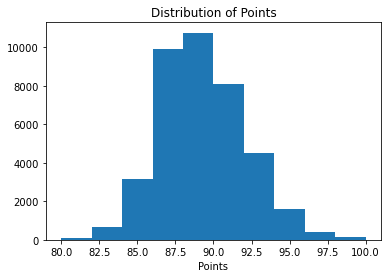

In [36]:
plt.hist(df2['rating'])
plt.title('Distribution of Points')
plt.xlabel('Points')
plt.show()

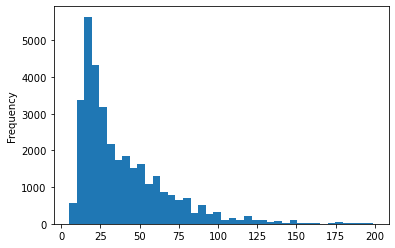

In [37]:
df1[df1['price'] < 200]['price'].plot.hist(bins=40);

<AxesSubplot:xlabel='price', ylabel='rating'>

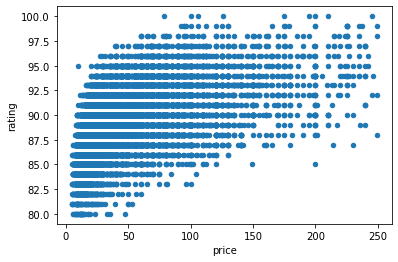

In [38]:
df2[df2['price']<250].plot.scatter(x='price', y='rating')

In [39]:
df2[df2['price']<200].corr()

rating     price       alc   vintage
rating   1.000000  0.584870  0.223726  0.120899
price    0.584870  1.000000  0.277126 -0.055321
alc      0.223726  0.277126  1.000000  0.011271
vintage  0.120899 -0.055321  0.011271  1.000000

In [40]:
df2.isnull().any()

name            False
review          False
taster           True
rating          False
price            True
designation      True
variety         False
appellation     False
winery          False
alc              True
bottle_size     False
category        False
importer        False
review_date     False
variety1        False
variety2         True
appellation1    False
region          False
nation           True
vintage         False
dtype: bool

In [41]:
df2.isnull().sum()

name                0
review              0
taster          16211
rating              0
price            5054
designation     11858
variety             0
appellation         0
winery              0
alc              3487
bottle_size         0
category            0
importer            0
review_date         0
variety1            0
variety2        17628
appellation1        0
region              0
nation             23
vintage             0
dtype: int64

In [42]:
# Sum of reviews per variety (Top 30)
df2["variety1"].value_counts().head(30)

Red Blends            7202
Nebbiolo              6046
Sangiovese            5319
White Blend           1613
Corvina               1532
Pinot Grigio          1483
Sangiovese Grosso     1307
Barbera               1033
Aglianico              657
Nero d'Avola           650
Chardonnay             638
Sparkling Blend        548
Sauvignon              526
Garganega              518
Glera                  513
Montepulciano          478
Merlot                 391
Primitivo              348
Turbiana               336
Pinot Bianco           313
Dolcetto               310
Moscato                307
Fiano                  302
Vermentino             299
Verdicchio             299
Nerello Mascalese      289
Rosato                 278
Syrah                  259
Pinot Nero             256
Cabernet Sauvignon     254
Name: variety1, dtype: int64

In [43]:
# Plotting Points and Price grouped by Variety (only ten visible)
df2.groupby(['rating', 'variety1'])['rating'].mean()

rating  variety1          
80      Arneis                 80
        Barbera                80
        Cabernet Sauvignon     80
        Chardonnay             80
        Cortese                80
                             ... 
100     Nebbiolo              100
        Prugnolo Gentile      100
        Red Blends            100
        Sangiovese            100
        Sangiovese Grosso     100
Name: rating, Length: 1506, dtype: int64

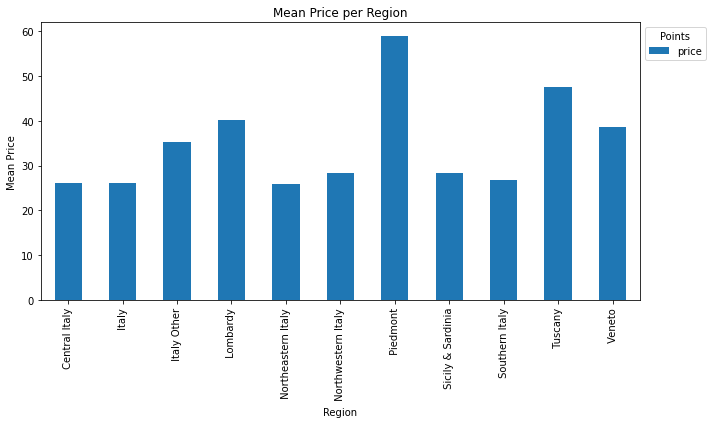

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))

df2.groupby(df2['region'])['price'].mean().plot.bar()
mean_price = df2["price"].mean(0)
df1["price"].fillna(mean_price)

# Creates labels
ax.set_xlabel('Region')
ax.set_ylabel('Mean Price')
# Sets the plot title
ax.set_title("Mean Price per Region")
ax.legend(bbox_to_anchor=(1, 1), loc=2, title='Points')

fig.tight_layout()

In [45]:
df2.region.value_counts()

 Tuscany               11935
 Piedmont               8126
 Veneto                 4487
 Northeastern Italy     4056
 Sicily & Sardinia      3947
 Southern Italy         3095
 Central Italy          2510
 Lombardy               1033
 Italy Other             174
 Northwestern Italy       33
 Italy                    23
Name: region, dtype: int64

which region had most reviews?

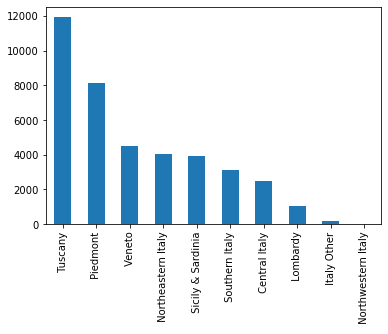

In [46]:
df2['region'].value_counts().head(10).plot.bar();

Distribution of the points plotted by the review counts.

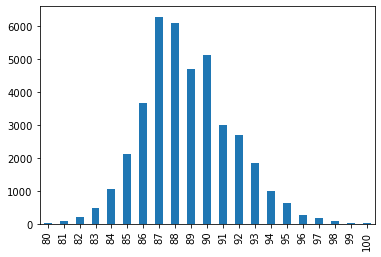

In [47]:
df2['rating'].value_counts().sort_index().plot.bar();

/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



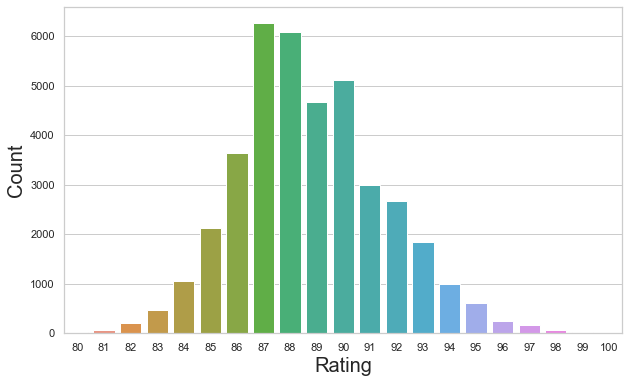

In [1110]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.countplot(df2['rating'])
plt.xlabel('Rating',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

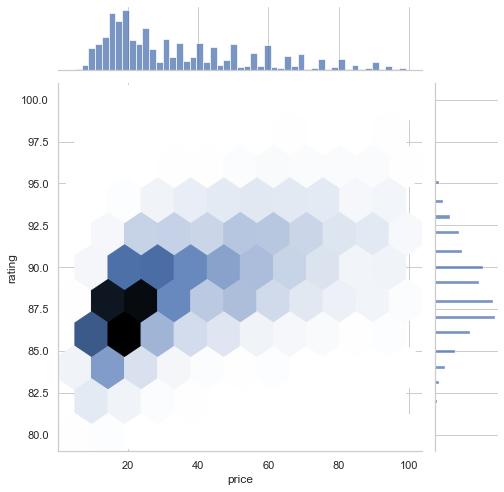

In [1103]:

sns.jointplot(x='price', y='rating', data=df2[df2['price'] < 100], kind='hex', 
              gridsize=10,height=7)
plt.show()

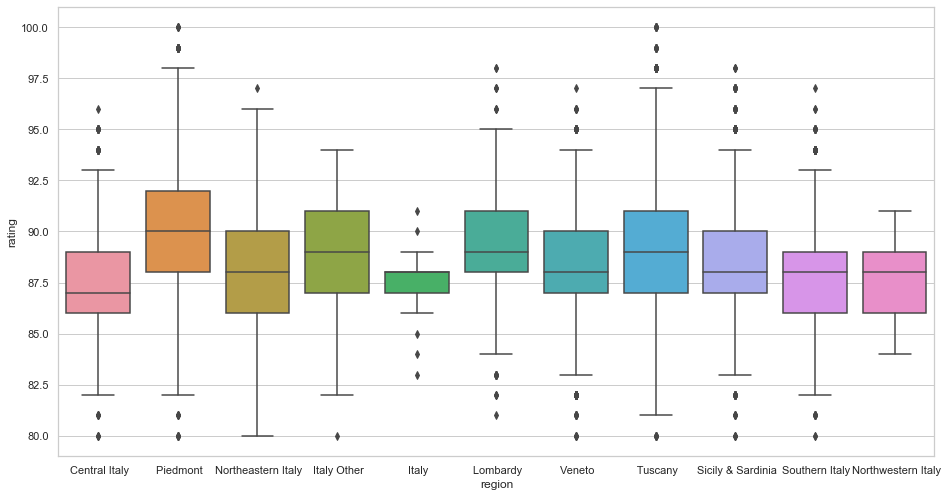

In [1086]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15.7, 8.27)
region_rating = sns.boxplot(x="region", y="rating", 
                 data=df2, dodge=False)

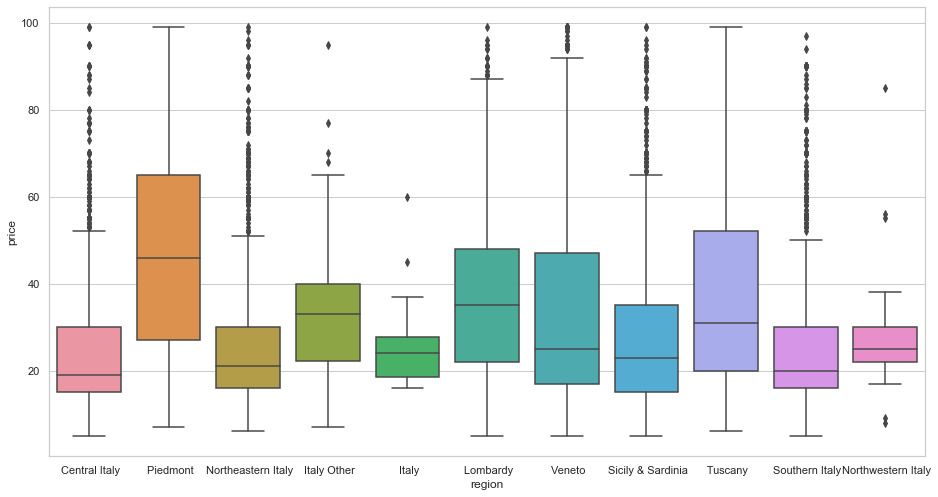

In [1085]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15.7, 8.27)
region_rating = sns.boxplot(x="region", y="price", 
                 data=df2[df2['price'] < 100], dodge=False,)

In [1044]:
df2[X_top_ten].rating

5        86
8        86
9        86
15       86
16       86
         ..
39439    90
39440    90
39441    90
39443    90
39444    90
Name: rating, Length: 19191, dtype: int64

In [1045]:
df2[X_top_ten].region

5              Piedmont
8              Piedmont
9              Piedmont
15             Piedmont
16        Central Italy
              ...      
39439          Piedmont
39440          Piedmont
39441          Piedmont
39443          Piedmont
39444          Piedmont
Name: region, Length: 19191, dtype: object

In [1046]:
df2[X_top_ten].variety1

5          nebbiolo
8          nebbiolo
9          nebbiolo
15         nebbiolo
16       sangiovese
            ...    
39439      nebbiolo
39440      nebbiolo
39441      nebbiolo
39443      nebbiolo
39444      nebbiolo
Name: variety1, Length: 19191, dtype: object

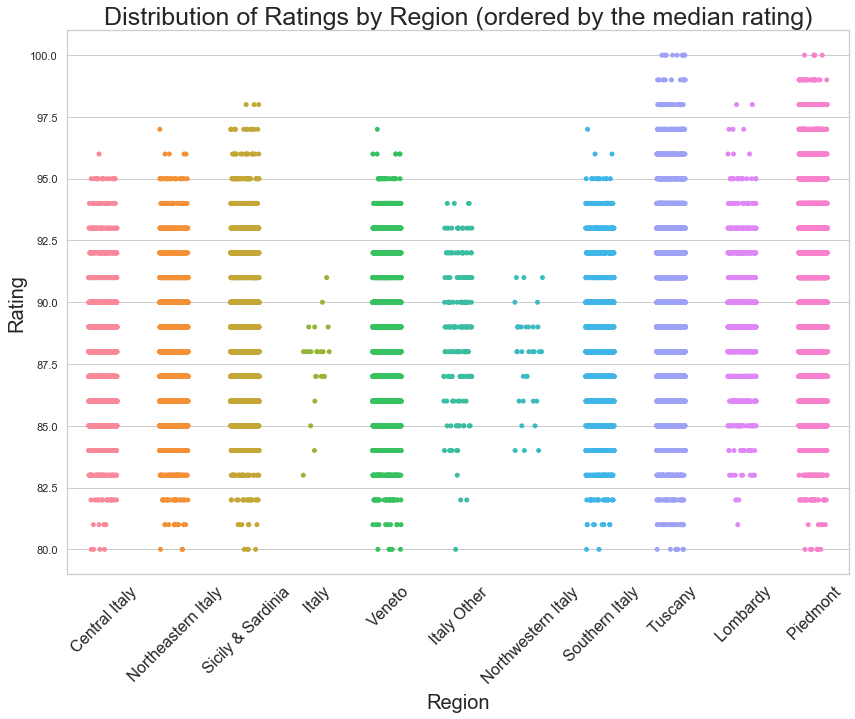

In [1112]:
fig2, ax = plt.subplots(figsize=(14, 10))
plot_order = df2[X_top_ten].groupby('region').rating.median().sort_values().index
sns.stripplot(data=df2, x='region', y='rating', order=plot_order, jitter=0.2)
# sns.lineplot(y=df2.groupby('region').rating.median().sort_values(),
#              x=df2.groupby('region').rating.median().sort_values().index)
plt.xticks(rotation=45, fontsize=16)
# plt.ylim(0,2300)
plt.xlabel('Region',fontsize=20)
plt.ylabel('Rating',fontsize=20)
plt.title('Distribution of Ratings by Region (ordered by the median rating)',fontsize=25)
plt.show()

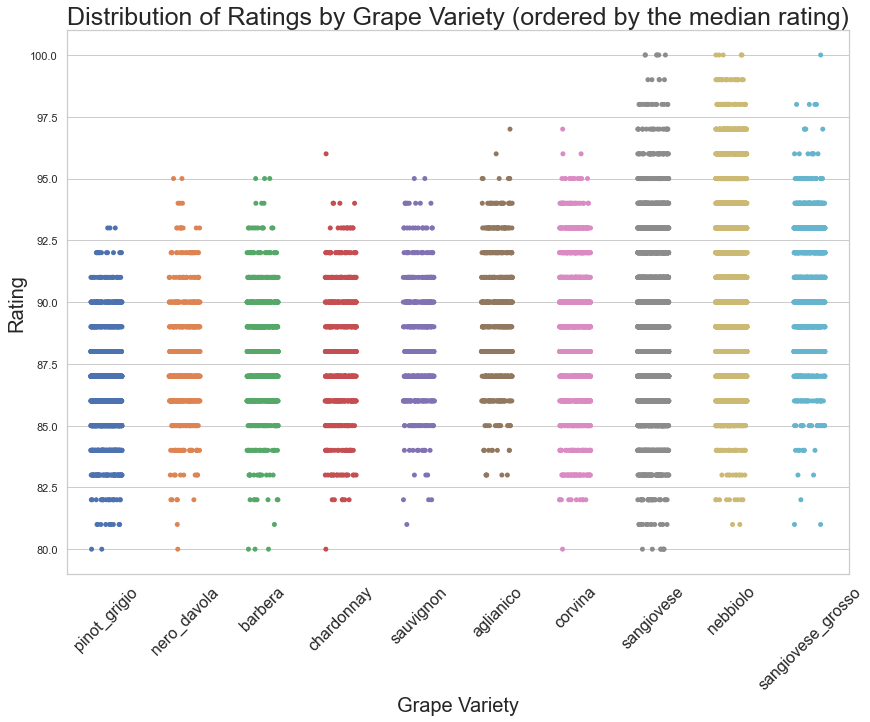

In [1063]:
fig2, ax = plt.subplots(figsize=(14, 10))
plot_order = df2[X_top_ten].groupby('variety1').rating.median().sort_values().index
sns.stripplot(data=df2, x='variety1', y='rating', order=plot_order, jitter=0.2)
# sns.lineplot(y=df2.groupby('region').rating.median().sort_values(),
#              x=df2.groupby('region').rating.median().sort_values().index)
plt.xticks(rotation=45, fontsize=16)
# plt.ylim(0,2300)
plt.xlabel('Grape Variety',fontsize=20)
plt.ylabel('Rating',fontsize=20)
plt.title('Distribution of Ratings by Grape Variety (ordered by the median rating)',fontsize=25)
plt.show()

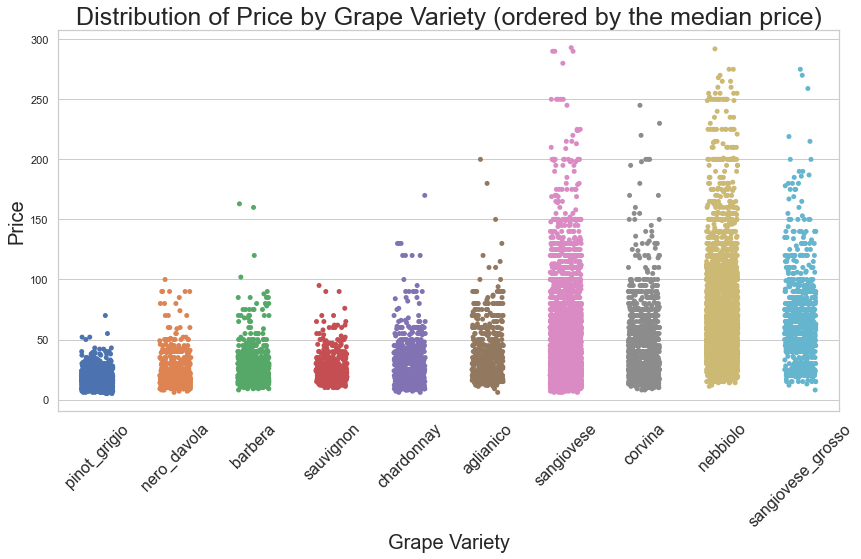

In [1115]:
fig2, ax = plt.subplots(figsize=(14, 7))
plot_order = df2[X_top_ten].groupby('variety1').price.median().sort_values().index
sns.stripplot(data=df2[df2['price'] <300 ], x='variety1', y='price', order=plot_order, jitter=0.2)
# sns.lineplot(y=df2[X_top_ten].groupby('variety1').price.median().sort_values(),
#              x=df2.groupby('variety1').price.median().sort_values().index)
plt.xticks(rotation=45, fontsize=16)
# plt.ylim(0,2300)
plt.xlabel('Grape Variety',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.title('Distribution of Price by Grape Variety (ordered by the median price)',fontsize=25)
plt.show()

In [1122]:
df2.variety1.value_counts().head(20)

red_blends           7202
nebbiolo             6046
sangiovese           5319
white_blend          1613
corvina              1532
pinot_grigio         1483
sangiovese_grosso    1307
barbera              1033
aglianico             657
nero_davola           650
chardonnay            638
sparkling_blend       548
sauvignon             526
garganega             518
glera                 513
montepulciano         478
merlot                391
primitivo             348
turbiana              336
pinot_bianco          313
Name: variety1, dtype: int64

In [50]:
df2.review[0]

"Ripe cherry and wild berry aromas take on a bit of bubblegum spice on the nose. While medium in weight, the fruit concentration is rather light on the palate. There's plushness to the feel, with juicy acidity and a sandy grip of tannins for balance. ALEXANDER PEARTREE"

In [51]:
df2.taster.value_counts()

KERIN O’KEEFE         20630
MICHAEL SCHACHNER      1096
ALEXANDER PEARTREE      847
JOE CZERWINSKI          406
ROGER VOSS              199
KRISTEN RICHARD          24
PAUL GREGUTT              6
Name: taster, dtype: int64

In [52]:
df2.taster.isnull().value_counts()

False    23208
True     16211
Name: taster, dtype: int64

In [53]:
# updated_line = ' '.join(eda.review[200].split(' ')[:-2])
# updated_line

In [54]:
df2.review[200]

'Made with Chardonnay, this has subdued aromas evoking ripe yellow peach and white flower. The forward, rounded palate offers ripe Bartlett pear and a hint of pineapple. KERIN O’KEEFE'

Removing the rewiers from the wine reviews in preparation of the nlp analysis

In [55]:
df2['review'] = df2['review'].str.replace(
    'KERIN O’KEEFE','').str.replace(
    'ALEXANDER PEARTREE','').str.replace(
    'MICHAEL SCHACHNER','').str.replace(
'JOE CZERWINSKI','').str.replace(
'ROGER VOSS','').str.replace(
'KRISTEN RICHARD','').str.replace(
'PAUL GREGUTT','')

<ipython-input-55-d28fea35039c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['review'] = df2['review'].str.replace(


In [56]:
df2['review'] = df2['review'].str.lower()

<ipython-input-56-5d7339761f81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['review'] = df2['review'].str.lower()


In [57]:
df2.review[1000]

'delicately scented, this opens with subtle whiffs of underbrush, violet and toast. reflecting the nose, the lean, rather austere palate offers dried cherry and a hint of hazelnut alongside dusty tannins that leave a drying finish. '

In [58]:
df2['value_for_money'] = df2.rating/df2.price

<ipython-input-58-0c180d762293>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['value_for_money'] = df2.rating/df2.price


In [59]:
grouped = df2.groupby(['variety1'] ,sort=False,dropna=True).mean()
grouped.sort_values('value_for_money').head(10)

rating       price        alc      vintage  \
variety1                                                                   
Francisa                   91.000000  160.000000  13.000000  2011.000000   
Oseleta                    90.000000  100.000000  14.000000  2001.000000   
Foglia Tonda               89.000000   75.000000  13.500000  2013.000000   
Moscato di Scanzo          88.000000   62.000000  15.500000  2007.000000   
Picolit                    90.808511   71.358974  13.391304  2006.148936   
Pugnitello                 88.142857   54.833333  14.000000  2009.714286   
Nebbiolo                   90.596758   70.707876  14.168146  2010.458981   
Cabernet Sauvignon-Merlot  89.923077   60.846154  13.388889  1999.153846   
Sangiovese Grosso          90.602142   67.578736  14.076436  2005.973221   
Cabernet Franc             90.738462   80.446429  14.039655  2009.661538   

                           value_for_money  
variety1                                    
Francisa                          0.568750  
Oseleta                           0.900000  
Foglia Tonda                      1.186667  
Moscato di Scanzo                 1.419355  
Picolit                           1.639243  
Pugnitello                        1.642500  
Nebbiolo                          1.660428  
Cabernet Sauvignon-Merlot         1.718167  
Sangiovese Grosso                 1.733405  
Cabernet Franc                    1.841882

In [60]:
grouped.sort_values('value_for_money', ascending=False).head(20)

rating      price        alc      vintage  \
variety1                                                                  
Chardonnay-Pinot Grigio    84.000000   9.000000  12.500000  2004.000000   
Cabernet Sauvignon-Shiraz  86.000000   9.500000  13.500000  2005.000000   
Alcamo                     88.000000  10.000000  13.500000  2002.000000   
Muscat                     86.000000  10.000000  13.000000  2005.000000   
Tai                        84.000000  10.000000  12.000000  2009.000000   
Fiano-Malvasia             86.500000  10.500000  12.750000  2018.000000   
Bombino Nero               87.000000  11.000000  11.500000  2007.000000   
Grillo-Chardonnay          87.000000  11.000000  13.000000  2019.000000   
Syrah-Primitivo            86.666667  12.000000  14.000000  2016.333333   
Shiraz                     86.888889  14.142857  13.444444  2005.444444   
Cabernet                   86.000000  13.000000  12.727273  2008.909091   
Negroamaro-Primitivo       87.000000  13.000000  14.000000  2017.000000   
Zinfandel                  85.500000  15.666667  14.500000  2007.750000   
Greco Bianco               86.000000  16.125000  12.772727  2012.909091   
Inzolia                    86.384615  15.854167  12.651163  2010.211538   
Rosé                       86.396739  15.882353  12.767045  2010.483696   
Gragnano                   84.000000  14.666667  11.833333  2010.666667   
Pinot Grigio               86.474039  16.962401  12.826912  2009.142279   
Tocai Rosso                84.500000  14.500000  11.000000  2006.500000   
Pinot Noir                 86.666667  21.909091  12.863636  2007.458333   

                           value_for_money  
variety1                                    
Chardonnay-Pinot Grigio           9.333333  
Cabernet Sauvignon-Shiraz         9.077778  
Alcamo                            8.800000  
Muscat                            8.600000  
Tai                               8.400000  
Fiano-Malvasia                    8.388889  
Bombino Nero                      7.909091  
Grillo-Chardonnay                 7.909091  
Syrah-Primitivo                   7.222222  
Shiraz                            6.846358  
Cabernet                          6.718442  
Negroamaro-Primitivo              6.692308  
Zinfandel                         6.219697  
Greco Bianco                      6.080601  
Inzolia                           5.998180  
Rosé                              5.979568  
Gragnano                          5.970922  
Pinot Grigio                      5.919792  
Tocai Rosso                       5.894231  
Pinot Noir                        5.889804

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39419 entries, 0 to 39445
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             39419 non-null  object 
 1   review           39419 non-null  object 
 2   taster           23208 non-null  object 
 3   rating           39419 non-null  int64  
 4   price            34365 non-null  float64
 5   designation      27561 non-null  object 
 6   variety          39419 non-null  object 
 7   appellation      39419 non-null  object 
 8   winery           39419 non-null  object 
 9   alc              35932 non-null  float64
 10  bottle_size      39419 non-null  object 
 11  category         39419 non-null  object 
 12  importer         39419 non-null  object 
 13  review_date      39419 non-null  object 
 14  variety1         39419 non-null  object 
 15  variety2         21791 non-null  object 
 16  appellation1     39419 non-null  object 
 17  region      

In [63]:
df2.rating.value_counts()

87     6277
88     6087
90     5111
89     4674
86     3651
91     3006
92     2675
85     2119
93     1839
84     1054
94     1002
95      613
83      466
96      258
82      199
97      168
98       70
81       66
99       35
80       34
100      15
Name: rating, dtype: int64

In [64]:
df2.rating.describe()

count    39419.000000
mean        88.774829
std          2.795050
min         80.000000
25%         87.000000
50%         88.000000
75%         90.000000
max        100.000000
Name: rating, dtype: float64

<!-- Wine Enthusiast's 100-point wine-scoring scale:

98–100 – Classic
94–97 – Superb
90–93 – Excellent
87–89 – Very good
83–86 – Good
80–82 – Acceptable -->

In [3]:
#creating a custom classification using the interquartile frequencies

In [65]:
conditions = [
    (df2['rating'] < 87),
    (df2['rating'] >= 87) & (df2['rating'] <= 88),
    (df2['rating'] > 88) & (df2['rating'] <= 90),
    (df2['rating'] > 90)
    ]
values = ['good', 'very_good', 'excellent', 'superb']

In [66]:
df2['final_judgement'] = np.select(conditions, values)

<ipython-input-66-736ef0f237fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['final_judgement'] = np.select(conditions, values)


In [67]:
conditions = [
    (df2['rating'] < 87),
    (df2['rating'] >= 87) & (df2['rating'] <= 88),
    (df2['rating'] > 88) & (df2['rating'] <= 90),
    (df2['rating'] > 90)
    ]
values = [4, 3, 2, 1]

In [68]:
df2['final_score'] = np.select(conditions, values)

<ipython-input-68-1928e55251ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['final_score'] = np.select(conditions, values)


In [69]:
df2.final_score.value_counts(normalize=True)

3    0.313656
2    0.248231
1    0.245592
4    0.192521
Name: final_score, dtype: float64

In [70]:
conditions2 = [
    (df2['rating'] <= 88),
    (df2['rating'] > 88) 
    ]
values2 = [0, 1]

In [71]:
df2['above_below_median_rating'] = np.select(conditions2, values2)

<ipython-input-71-69dc5cffade7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['above_below_median_rating'] = np.select(conditions2, values2)


In [72]:
df2.above_below_median_rating.value_counts(normalize=True)

0    0.506177
1    0.493823
Name: above_below_median_rating, dtype: float64

In [73]:
df2.review[50]

'forest floor, red berry, leather and pipe tobacco aromas are front and center. the intense, full-bodied palate offers impressive structure and finesse, delivering succulent marasca cherry, cinnamon, star anise and a hint of hazelnut alongside assertive but noble tannins and vibrant acidity. it already shows focus and depth, but give it time to fully bloom. drink 2026–2038. '

In [74]:
def remove_numbers(review):
    return ''.join(c for c in review if  not c.isdigit())   

In [75]:
df2.review = df2.review.apply(remove_numbers)

/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [76]:
df2.review[70]

'leather, tilled earth, grated clove and black cherry aromas take center stage along with a whiff of fragrant blue flower. the taut, velvety palate doles out raspberry extract, ripe cranberry, tobacco and licorice alongside firm acidity and close-grained tannins that leave a drying finish. drink –. '

In [1216]:
df2.columns

Index(['name', 'review', 'taster', 'rating', 'price', 'designation', 'variety',
       'appellation', 'winery', 'alc', 'bottle_size', 'category', 'importer',
       'review_date', 'variety1', 'variety2', 'appellation1', 'region',
       'nation', 'vintage', 'value_for_money', 'final_judgement',
       'final_score', 'above_below_median_rating', 'review_test'],
      dtype='object')

In [78]:
df2.variety1.unique()

array(['Montepulciano', 'Nebbiolo', 'Pecorino', 'Cortese', 'Red Blends',
       'Trebbiano', 'Sangiovese', 'Rosato', 'Merlot',
       'Cabernet Sauvignon', 'Chardonnay', 'Passerina', 'Verdicchio',
       'Pinot Grigio', 'Kerner', 'Sauvignon', 'Riesling', 'Pinot Bianco',
       'White Blend', 'Sparkling Blend', 'Cesanese', 'Malvasia del Lazio',
       'Syrah', 'Cabernet Franc', 'Viognier', 'Müller-Thurgau',
       'Grüner Veltliner', 'Sylvaner', 'Turbiana', 'Arneis', 'Friulano',
       'Rosé', 'Nerello Mascalese', 'Pinot Nero', 'Aglianico', 'Durella',
       'Pallagrello Bianco', 'Manzoni', 'Vermentino', 'Ciliegiolo',
       'Pugnitello', 'Canaiolo', 'Nero di Troia', 'Primitivo',
       'Sagrantino', 'Negroamaro', 'Malvasia', 'Negroamaro-Malvasia',
       'Fiano', 'Syrah-Primitivo', 'Falanghina', 'Alicante',
       'Primitivo-Cabernet Sauvignon', 'Moscato', 'Susumaniello',
       'Fiano-Chardonnay', 'Fiano-Malvasia', 'Glera', 'Dorona',
       'Cannonau', 'Vespolina', 'Carignano', 'Nasco

In [79]:
df2['variety1'] = df2['variety1'].str.lower().str.replace(
    '-','_').str.replace(' ','_').str.replace("'",'')

<ipython-input-79-2f412f446f9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['variety1'] = df2['variety1'].str.lower().str.replace(


In [80]:
df2.variety1.unique()

array(['montepulciano', 'nebbiolo', 'pecorino', 'cortese', 'red_blends',
       'trebbiano', 'sangiovese', 'rosato', 'merlot',
       'cabernet_sauvignon', 'chardonnay', 'passerina', 'verdicchio',
       'pinot_grigio', 'kerner', 'sauvignon', 'riesling', 'pinot_bianco',
       'white_blend', 'sparkling_blend', 'cesanese', 'malvasia_del_lazio',
       'syrah', 'cabernet_franc', 'viognier', 'müller_thurgau',
       'grüner_veltliner', 'sylvaner', 'turbiana', 'arneis', 'friulano',
       'rosé', 'nerello_mascalese', 'pinot_nero', 'aglianico', 'durella',
       'pallagrello_bianco', 'manzoni', 'vermentino', 'ciliegiolo',
       'pugnitello', 'canaiolo', 'nero_di_troia', 'primitivo',
       'sagrantino', 'negroamaro', 'malvasia', 'negroamaro_malvasia',
       'fiano', 'syrah_primitivo', 'falanghina', 'alicante',
       'primitivo_cabernet_sauvignon', 'moscato', 'susumaniello',
       'fiano_chardonnay', 'fiano_malvasia', 'glera', 'dorona',
       'cannonau', 'vespolina', 'carignano', 'nasco

In [ ]:
# removing grape varieties and generic names which do not add anything to the analysis

In [81]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop += ['pinot','montepulciano', 'nebbiolo', 'red_blends', 'sangiovese', 'merlot',
       'chardonnay', 'pinot_grigio', 'sauvignon', 'pinot_bianco',
       'white_blend', 'sparkling_blend', 'turbiana', 'aglianico',
       'primitivo', 'glera', "nero_avola", 'barbera', 'garganega',
       'corvina', 'sangiovese_grosso','aromas','palate','wine','offers','alongside','drink',
        'opens','flavors','notes','delivers','note','firm','shows','blend',
         'lead','mouth','glass','italy','nose','nero','avola','unavailable','time',
         'grigios','grigio','based']

<ipython-input-676-0ced10ddb13e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["review_test"] = df2["review"].apply(clean_description)


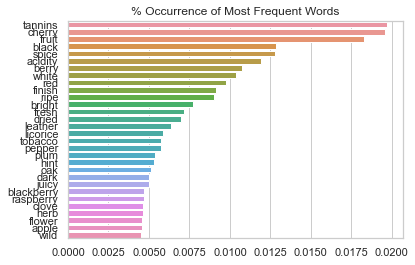

In [676]:
import seaborn as sns 
import matplotlib.pyplot as plt
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize

# set seaborn style 
sns.set(style="whitegrid")

stopwords = stop
# Detokenizer combines tokenized elements
detokenizer = TreebankWordDetokenizer()

def clean_description(desc):
    desc = word_tokenize(desc.lower())
    desc = [token for token in desc if token not in stopwords and token.isalpha()]
    return detokenizer.detokenize(desc)

df2["review_test"] = df2["review"].apply(clean_description)

word_occurrence = df2["review_test"].str.split(expand=True).stack().value_counts()

total_words = sum(word_occurrence)

# plot most common words 

top_words = word_occurrence[:30]/total_words

ax = sns.barplot(x = top_words.values, y = top_words.index)

# Setting title 
ax.set_title("% Occurrence of Most Frequent Words")

plt.show()

In [681]:
from sklearn.feature_extraction.text import CountVectorizer

In [682]:
# # Setting the vectorizer just like we would set a model
# cvec = CountVectorizer()

# # Fitting the vectorizer on our training data
# cvec.fit(df2['review'])

In [683]:
# Lets check the length of our data that is in a vectorized state
# len(cvec.get_feature_names())

In [685]:
# Lets use the stop_words argument to remove words like "and, the, a"
cvec3 = CountVectorizer(stop_words=stop)

# Fit our vectorizer using our train data
cvec3.fit(df2['review'])

# Transform training data
cvec_mat3 = cvec3.transform(df2['review'])

# words occuring
words = cvec3.get_feature_names()
print(words[0:100])
print()
# number of different words
print(len(words))

['aacacia', 'aba', 'abandoned', 'abarbanel', 'abate', 'abated', 'abbacchio', 'abbazia', 'abbess', 'abbey', 'abboccato', 'abbonas', 'abbreviated', 'abbruzzo', 'abbuoto', 'ability', 'able', 'abnormal', 'abound', 'abounding', 'abounds', 'abrasive', 'abraxas', 'abrigo', 'abroad', 'abrupt', 'abruptly', 'abruzzi', 'abruzzo', 'absence', 'absent', 'absolute', 'absolutely', 'absorb', 'absorbed', 'absorbing', 'absorbs', 'abundance', 'abundant', 'abundantly', 'abv', 'acacia', 'acate', 'accent', 'accented', 'accenting', 'accents', 'accentuate', 'accentuated', 'accentuates', 'accept', 'acceptability', 'acceptable', 'access', 'accessibility', 'accessible', 'acciaiolo', 'acciderba', 'acclaimed', 'accommodates', 'accommodating', 'accommodation', 'accompanied', 'accompanies', 'accompaniment', 'accompany', 'accompanying', 'accompinament', 'accomplish', 'accomplishes', 'accomplishment', 'accompnaied', 'according', 'accordini', 'accounting', 'accounts', 'accurate', 'acdity', 'ace', 'aceri', 'aces', 'aceta

In [686]:
cvec3.get_feature_names()[80:100]

['aces',
 'acetate',
 'acetic',
 'acetone',
 'achelo',
 'achieve',
 'achieved',
 'achievement',
 'achievements',
 'achieves',
 'achieving',
 'acid',
 'acidic',
 'acidicity',
 'acidity',
 'acids',
 'acidty',
 'acinatico',
 'acini',
 'acininobili']

In [688]:
cvec_mat3.sum(axis=0)

matrix([[1, 1, 1, ..., 1, 3, 6]])

MOST FREQUENT WORDS FOR ALL WINES

In [689]:
a = cvec_mat3.sum(axis=0)
pd.DataFrame(a, columns=words).transpose().sort_values(by=0, ascending=False)[:10]

0
cherry   16762
tannins  16425
fruit    15785
black    12323
spice    10963
acidity   9948
berry     9346
white     8796
red       8647
finish    7640

MOST FREQENT WORDS FOR WINES WITH A RATING OF 94 AND ABOVE

In [690]:
a = cvec_mat3[df2.rating>=94].sum(axis=0)
pd.DataFrame(a, columns=words).transpose().sort_values(by=0, ascending=False)[:10]

0
cherry     1545
tannins    1485
berry      1021
red         974
spice       967
acidity     956
black       894
licorice    772
leather     758
raspberry   651

In [691]:
# count word appearances
def word_counter(mat):
    count = np.array(mat.sum(axis=0))[0]
    return count

In [692]:
csum = word_counter(cvec_mat3)
csum

array([1, 1, 1, ..., 1, 3, 6])

In [693]:
cvec_mat3.sum(axis=0)

matrix([[1, 1, 1, ..., 1, 3, 6]])

In [694]:
# sort words by frequency
from operator import itemgetter


def word_frequency_sorter(words, counts):
    sort_result = sorted(zip(words, list(counts)),
                         key=itemgetter(1), reverse=True)
    return sort_result

In [695]:
df_word_frequency = pd.DataFrame(word_frequency_sorter(
    words, csum), columns=['word', 'frequency'])
df_word_frequency.set_index('word', inplace=True)
df_word_frequency.head(10)

frequency
word              
cherry       16762
tannins      16425
fruit        15785
black        12323
spice        10963
acidity       9948
berry         9346
white         8796
red           8647
finish        7640

In [696]:
df_cvec = pd.DataFrame(cvec_mat3.toarray(), columns=cvec3.get_feature_names())
df_cvec.sum(axis=0).sort_values(ascending=False)[1:50]

tannins       16425
fruit         15785
black         12323
spice         10963
acidity        9948
berry          9346
white          8796
red            8647
finish         7640
ripe           7544
bright         6421
fresh          5990
dried          5905
dark           5331
leather        5329
oak            4975
licorice       4888
tobacco        4837
pepper         4828
plum           4607
hint           4454
juicy          4153
flower         3976
blackberry     3939
raspberry      3916
apple          3916
herb           3894
clove          3860
wild           3856
almond         3836
citrus         3741
vanilla        3734
peach          3719
whiff          3701
made           3614
close          3607
mineral        3417
mature         3274
yellow         3246
bodied         3217
grained        3161
crushed        3153
anise          3078
smooth         3003
toasted        2990
crisp          2925
polished       2906
soft           2882
stone          2847
dtype: int64

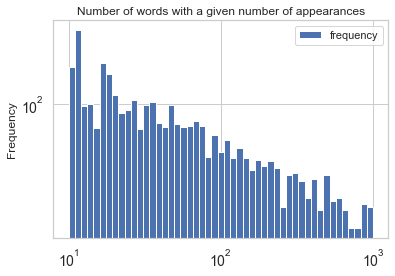

In [697]:
df_word_frequency.plot(kind='hist',
                       bins=np.logspace(1, 3, 50),
                       loglog=True,
                       title='Number of words with a given number of appearances',
                       fontsize=14)
plt.show()

Most frequent words within each grape variety:

In [908]:
gv_sorted = df2.variety1.value_counts(ascending=False)
gv_sorted_df= pd.DataFrame(gv_sorted)
gv_sorted_df= gv_sorted_df.reset_index()
gv_sorted_df.columns =['gv','counts_for_gv']
list(gv_sorted_df.gv)

['red_blends',
 'nebbiolo',
 'sangiovese',
 'white_blend',
 'corvina',
 'pinot_grigio',
 'sangiovese_grosso',
 'barbera',
 'aglianico',
 'nero_davola',
 'chardonnay',
 'sparkling_blend',
 'sauvignon',
 'garganega',
 'glera',
 'montepulciano',
 'merlot',
 'primitivo',
 'turbiana',
 'pinot_bianco',
 'dolcetto',
 'moscato',
 'fiano',
 'vermentino',
 'verdicchio',
 'nerello_mascalese',
 'rosato',
 'syrah',
 'pinot_nero',
 'cabernet_sauvignon',
 'greco',
 'grillo',
 'vernaccia',
 'friulano',
 'falanghina',
 'sagrantino',
 'rosé',
 'cortese',
 'negroamaro',
 'ribolla_gialla',
 'pecorino',
 'prosecco',
 'carricante',
 'arneis',
 'prugnolo_gentile',
 'trebbiano',
 'sauvignon_blanc',
 'lagrein',
 'cannonau',
 'frappato',
 'malvasia',
 'gewürztraminer',
 'insolia',
 'cabernet_franc',
 'carignano',
 'lambrusco_di_sorbara',
 'catarratto',
 'riesling',
 'zibibbo',
 'inzolia',
 'lambrusco',
 'picolit',
 'müller_thurgau',
 'piedirosso',
 'nero_di_troia',
 'kerner',
 'albana',
 'coda_di_volpe',
 'pass

In [909]:
target_names = list(gv_sorted_df.gv)
target_names

['red_blends',
 'nebbiolo',
 'sangiovese',
 'white_blend',
 'corvina',
 'pinot_grigio',
 'sangiovese_grosso',
 'barbera',
 'aglianico',
 'nero_davola',
 'chardonnay',
 'sparkling_blend',
 'sauvignon',
 'garganega',
 'glera',
 'montepulciano',
 'merlot',
 'primitivo',
 'turbiana',
 'pinot_bianco',
 'dolcetto',
 'moscato',
 'fiano',
 'vermentino',
 'verdicchio',
 'nerello_mascalese',
 'rosato',
 'syrah',
 'pinot_nero',
 'cabernet_sauvignon',
 'greco',
 'grillo',
 'vernaccia',
 'friulano',
 'falanghina',
 'sagrantino',
 'rosé',
 'cortese',
 'negroamaro',
 'ribolla_gialla',
 'pecorino',
 'prosecco',
 'carricante',
 'arneis',
 'prugnolo_gentile',
 'trebbiano',
 'sauvignon_blanc',
 'lagrein',
 'cannonau',
 'frappato',
 'malvasia',
 'gewürztraminer',
 'insolia',
 'cabernet_franc',
 'carignano',
 'lambrusco_di_sorbara',
 'catarratto',
 'riesling',
 'zibibbo',
 'inzolia',
 'lambrusco',
 'picolit',
 'müller_thurgau',
 'piedirosso',
 'nero_di_troia',
 'kerner',
 'albana',
 'coda_di_volpe',
 'pass

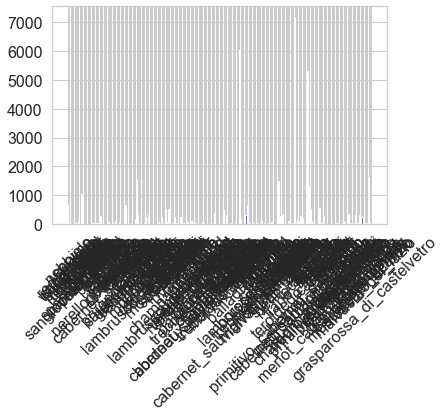

In [910]:
plt.bar(*np.unique(df2.variety1, return_counts=True))
plt.xticks(range(len(target_names)), 
           (target_names), 
           fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
# we do have too many grape varieties therefore I will focus on the maim ones in the analysis

In [911]:
df2.variety1.value_counts()

red_blends            7202
nebbiolo              6046
sangiovese            5319
white_blend           1613
corvina               1532
                      ... 
malvasia_del_lazio       1
foglia_tonda             1
moscato_di_noto          1
bombino_nero             1
merlot_syrah             1
Name: variety1, Length: 231, dtype: int64



# Part 1b: Network analysis




In [913]:
df_word_frequency = {}
for i in range(0,20):
    csum_i = word_counter(cvec_mat3[df2.variety1 == target_names[i], :])
    df_word_frequency[i] = pd.DataFrame(word_frequency_sorter(
        words, csum_i), columns=['word', 'frequency'])
    df_word_frequency[i].set_index('word', inplace=True)
    print(target_names[i])
    print(df_word_frequency[i].head(100))
    print()
#     how do i divide by the value counts of the categories?

red_blends
         frequency
word              
tannins       4626
black         4330
cherry        4228
spice         2792
red           2387
...            ...
vibrant        318
light          316
petit          316
verdot         316
pair           314

[100 rows x 1 columns]

nebbiolo
            frequency
word                 
tannins          4759
cherry           3988
berry            2590
spice            2214
red              2112
...               ...
leave             329
roasted           329
grilled           328
strawberry        328
mineral           325

[100 rows x 1 columns]

sangiovese
         frequency
word              
cherry        3661
tannins       3393
black         2448
berry         1835
fruit         1795
...            ...
light          252
tight          250
jam            249
support        248
easy           246

[100 rows x 1 columns]

white_blend
             frequency
word                  
fruit              912
white              874
acidity   

In [716]:

{'nebbiolo':df_word_frequency[1].head(200).to_dict()['frequency']}

{'nebbiolo': {'tannins': 4759,
  'cherry': 3988,
  'berry': 2590,
  'spice': 2214,
  'red': 2112,
  'black': 2022,
  'licorice': 1792,
  'acidity': 1603,
  'leather': 1555,
  'fruit': 1482,
  'finish': 1320,
  'dried': 1260,
  'rose': 1242,
  'dark': 1208,
  'raspberry': 1199,
  'tobacco': 1190,
  'grained': 1136,
  'anise': 1113,
  'ripe': 1065,
  'clove': 1057,
  'herb': 958,
  'oak': 949,
  'pepper': 936,
  'crushed': 916,
  'wild': 896,
  'bright': 895,
  'star': 894,
  'fine': 876,
  'whiff': 856,
  'barolo': 846,
  'white': 832,
  'underbrush': 798,
  'structured': 764,
  'juicy': 754,
  'espresso': 752,
  'hint': 724,
  'bodied': 722,
  'fresh': 717,
  'close': 687,
  'menthol': 676,
  'polished': 668,
  'full': 659,
  'vanilla': 649,
  'elegant': 635,
  'baking': 604,
  'balsamic': 599,
  'taut': 598,
  'years': 595,
  'sage': 581,
  'assertive': 573,
  'coffee': 566,
  'violet': 560,
  'cinnamon': 525,
  'sour': 515,
  'mint': 509,
  'new': 502,
  'flower': 495,
  'astringent'

In [914]:
wine_all= {} 
for i in range(0,20):
    wine_all[target_names[i]]=df_word_frequency[i].head(200).to_dict()['frequency']
    
    

In [915]:
wine_all['nebbiolo'].keys()

dict_keys(['tannins', 'cherry', 'berry', 'spice', 'red', 'black', 'licorice', 'acidity', 'leather', 'fruit', 'finish', 'dried', 'rose', 'dark', 'raspberry', 'tobacco', 'grained', 'anise', 'ripe', 'clove', 'herb', 'oak', 'pepper', 'crushed', 'wild', 'bright', 'star', 'fine', 'whiff', 'barolo', 'white', 'underbrush', 'structured', 'juicy', 'espresso', 'hint', 'bodied', 'fresh', 'close', 'menthol', 'polished', 'full', 'vanilla', 'elegant', 'baking', 'balsamic', 'taut', 'years', 'sage', 'assertive', 'coffee', 'violet', 'cinnamon', 'sour', 'mint', 'new', 'flower', 'astringent', 'give', 'tight', 'blue', 'tightly', 'provide', 'camphor', 'earth', 'forest', 'along', 'vibrant', 'plum', 'skinned', 'toasted', 'drying', 'cranberry', 'refined', 'orange', 'mocha', 'balanced', 'still', 'mature', 'fragrant', 'truffle', 'savory', 'together', 'toast', 'already', 'emerge', 'linear', 'marasca', 'austere', 'rather', 'floor', 'bean', 'barbaresco', 'cola', 'scents', 'leave', 'roasted', 'grilled', 'strawberry'

In [916]:
wine_all_edge_weights = {}
for i in range(0,20):
    wine_all_edge_weights[target_names[i]]={}
    for j in range(0,20):
        if target_names[i]==target_names[j]:
            pass
        else:
            wine_all_edge_weights[target_names[i]][target_names[j]]= len([w for w in 
                wine_all[target_names[i]].keys() if w in wine_all[target_names[j]].keys()
                                                             ])
    


In [917]:
wine_all_edge= {}
for i in range(0,20):
    wine_all_edge[target_names[i]]={}
    for j in range(0,20):
        if target_names[i]==target_names[j]:
            pass
        else:
            wine_all_edge[target_names[i]][target_names[j]]= [w for w in 
                wine_all[target_names[i]].keys() if w in wine_all[target_names[j]].keys()
                                                             ]

In [991]:
wine_all_edge

{'red_blends': {'nebbiolo': ['tannins',
   'black',
   'cherry',
   'spice',
   'red',
   'fruit',
   'berry',
   'pepper',
   'ripe',
   'plum',
   'dark',
   'blackberry',
   'tobacco',
   'dried',
   'leather',
   'clove',
   'licorice',
   'acidity',
   'oak',
   'finish',
   'hint',
   'skinned',
   'juicy',
   'grained',
   'bright',
   'white',
   'fresh',
   'vanilla',
   'polished',
   'whiff',
   'raspberry',
   'underbrush',
   'espresso',
   'smooth',
   'anise',
   'wild',
   'fine',
   'chocolate',
   'soft',
   'prune',
   'herb',
   'baking',
   'savory',
   'blue',
   'flower',
   'mature',
   'coffee',
   'bodied',
   'crushed',
   'star',
   'violet',
   'earth',
   'toasted',
   'cinnamon',
   'close',
   'velvety',
   'mocha',
   'jam',
   'dense',
   'well',
   'rich',
   'cedar',
   'straightforward',
   'along',
   'chewy',
   'exotic',
   'doles',
   'soil',
   'sweet',
   'structured',
   'toast',
   'grilled',
   'full',
   'earthy',
   'elegant',
   'provide

In [994]:
len(wine_all_edge['red_blends']['nebbiolo'])

145

In [919]:
wine_all_edge_weights

{'red_blends': {'nebbiolo': 145,
  'sangiovese': 166,
  'white_blend': 88,
  'corvina': 104,
  'pinot_grigio': 85,
  'sangiovese_grosso': 103,
  'barbera': 151,
  'aglianico': 150,
  'nero_davola': 149,
  'chardonnay': 91,
  'sparkling_blend': 77,
  'sauvignon': 87,
  'garganega': 86,
  'glera': 70,
  'montepulciano': 127,
  'merlot': 131,
  'primitivo': 125,
  'turbiana': 76,
  'pinot_bianco': 84},
 'nebbiolo': {'red_blends': 145,
  'sangiovese': 159,
  'white_blend': 71,
  'corvina': 82,
  'pinot_grigio': 65,
  'sangiovese_grosso': 94,
  'barbera': 125,
  'aglianico': 143,
  'nero_davola': 116,
  'chardonnay': 76,
  'sparkling_blend': 80,
  'sauvignon': 77,
  'garganega': 77,
  'glera': 68,
  'montepulciano': 105,
  'merlot': 114,
  'primitivo': 101,
  'turbiana': 73,
  'pinot_bianco': 80},
 'sangiovese': {'red_blends': 166,
  'nebbiolo': 159,
  'white_blend': 83,
  'corvina': 96,
  'pinot_grigio': 79,
  'sangiovese_grosso': 102,
  'barbera': 147,
  'aglianico': 147,
  'nero_davola':

In [844]:
import networkx as nx
import re

add node for each grape variety

In [972]:
netchart= nx.Graph()
for gv in wine_all.keys():
    netchart.add_node(gv, size=(wine_all[gv]))

In [973]:
netchart.nodes

NodeView(('red_blends', 'nebbiolo', 'sangiovese', 'white_blend', 'corvina', 'pinot_grigio', 'sangiovese_grosso', 'barbera', 'aglianico', 'nero_davola', 'chardonnay', 'sparkling_blend', 'sauvignon', 'garganega', 'glera', 'montepulciano', 'merlot', 'primitivo', 'turbiana', 'pinot_bianco'))

In [974]:
for g in wine_all_edge:
    print (g)

red_blends
nebbiolo
sangiovese
white_blend
corvina
pinot_grigio
sangiovese_grosso
barbera
aglianico
nero_davola
chardonnay
sparkling_blend
sauvignon
garganega
glera
montepulciano
merlot
primitivo
turbiana
pinot_bianco


In [975]:
wine_all_edge['glera'].keys()

dict_keys(['red_blends', 'nebbiolo', 'sangiovese', 'white_blend', 'corvina', 'pinot_grigio', 'sangiovese_grosso', 'barbera', 'aglianico', 'nero_davola', 'chardonnay', 'sparkling_blend', 'sauvignon', 'garganega', 'montepulciano', 'merlot', 'primitivo', 'turbiana', 'pinot_bianco'])

In [976]:
wine_all_edge['primitivo']['nebbiolo']

['fruit',
 'tannins',
 'cherry',
 'spice',
 'blackberry',
 'acidity',
 'black',
 'red',
 'plum',
 'berry',
 'dark',
 'ripe',
 'finish',
 'sweet',
 'tones',
 'juicy',
 'earth',
 'soft',
 'medium',
 'bright',
 'pepper',
 'rich',
 'bodied',
 'dried',
 'jam',
 'oak',
 'violet',
 'dense',
 'prune',
 'well',
 'savory',
 'orange',
 'raspberry',
 'licorice',
 'mature',
 'tobacco',
 'chewy',
 'chocolate',
 'smooth',
 'tilled',
 'close',
 'full',
 'crushed',
 'tart',
 'support',
 'berries',
 'fresh',
 'clove',
 'cake',
 'carry',
 'expression',
 'mouthfeel',
 'velvety',
 'concentrated',
 'fine',
 'leather',
 'anise',
 'balanced',
 'herbs',
 'grained',
 'balance',
 'coffee',
 'structure',
 'cinnamon',
 'strawberry',
 'toasted',
 'give',
 'polished',
 'vanilla',
 'vibrant',
 'offering',
 'baking',
 'game',
 'solid',
 'earthy',
 'espresso',
 'ground',
 'succulent',
 'tar',
 'toast',
 'whiff',
 'cranberry',
 'exotic',
 'grilled',
 'hint',
 'intensity',
 'mineral',
 'richness',
 'roasted',
 'spices',


In [977]:
for gv in wine_all_edge.keys():
    for otherwine in wine_all_edge[gv].keys():
        if len(wine_all_edge[gv][otherwine])>0:
            netchart.add_edge(gv,otherwine,weight= len(wine_all_edge[gv][otherwine]))
        

In [978]:
netchart.edges()

EdgeView([('red_blends', 'nebbiolo'), ('red_blends', 'sangiovese'), ('red_blends', 'white_blend'), ('red_blends', 'corvina'), ('red_blends', 'pinot_grigio'), ('red_blends', 'sangiovese_grosso'), ('red_blends', 'barbera'), ('red_blends', 'aglianico'), ('red_blends', 'nero_davola'), ('red_blends', 'chardonnay'), ('red_blends', 'sparkling_blend'), ('red_blends', 'sauvignon'), ('red_blends', 'garganega'), ('red_blends', 'glera'), ('red_blends', 'montepulciano'), ('red_blends', 'merlot'), ('red_blends', 'primitivo'), ('red_blends', 'turbiana'), ('red_blends', 'pinot_bianco'), ('nebbiolo', 'sangiovese'), ('nebbiolo', 'white_blend'), ('nebbiolo', 'corvina'), ('nebbiolo', 'pinot_grigio'), ('nebbiolo', 'sangiovese_grosso'), ('nebbiolo', 'barbera'), ('nebbiolo', 'aglianico'), ('nebbiolo', 'nero_davola'), ('nebbiolo', 'chardonnay'), ('nebbiolo', 'sparkling_blend'), ('nebbiolo', 'sauvignon'), ('nebbiolo', 'garganega'), ('nebbiolo', 'glera'), ('nebbiolo', 'montepulciano'), ('nebbiolo', 'merlot'), (

In [979]:
pos_= nx.spring_layout(netchart)

In [980]:
pos_

{'red_blends': array([0.64658434, 0.39314308]),
 'nebbiolo': array([-0.36273423,  0.72854254]),
 'sangiovese': array([-0.61535937,  0.22072456]),
 'white_blend': array([-0.12343287, -0.56918293]),
 'corvina': array([0.4139022 , 0.07461004]),
 'pinot_grigio': array([ 0.54082883, -0.32560529]),
 'sangiovese_grosso': array([0.63073172, 0.77242464]),
 'barbera': array([-0.15334081,  0.51356493]),
 'aglianico': array([0.05499358, 0.92004207]),
 'nero_davola': array([0.30393072, 0.5891054 ]),
 'chardonnay': array([-0.27136771, -0.28470842]),
 'sparkling_blend': array([ 0.22071909, -0.58503626]),
 'sauvignon': array([-0.68518826, -0.15033668]),
 'garganega': array([-0.41915004, -0.76384838]),
 'glera': array([-0.73143768, -0.52860408]),
 'montepulciano': array([-0.14115963,  0.08302301]),
 'merlot': array([0.77183894, 0.00860025]),
 'primitivo': array([-0.71633183,  0.56091118]),
 'turbiana': array([ 0.03619918, -1.        ]),
 'pinot_bianco': array([ 0.59977385, -0.65736968])}

In [981]:
netchart.edges()[('nebbiolo','sangiovese')]

{'weight': 159}

In [982]:
edge_weights = [e[2]['weight'] for e in netchart.edges(data=True)]
print(max(edge_weights))
sorted(list(netchart.edges(data=True)), key=lambda x: x[2]['weight'], reverse=True)[:10]

166


[('red_blends', 'sangiovese', {'weight': 166}),
 ('nebbiolo', 'sangiovese', {'weight': 159}),
 ('red_blends', 'barbera', {'weight': 151}),
 ('barbera', 'nero_davola', {'weight': 151}),
 ('red_blends', 'aglianico', {'weight': 150}),
 ('red_blends', 'nero_davola', {'weight': 149}),
 ('montepulciano', 'primitivo', {'weight': 149}),
 ('corvina', 'sangiovese_grosso', {'weight': 148}),
 ('sangiovese', 'barbera', {'weight': 147}),
 ('sangiovese', 'aglianico', {'weight': 147})]

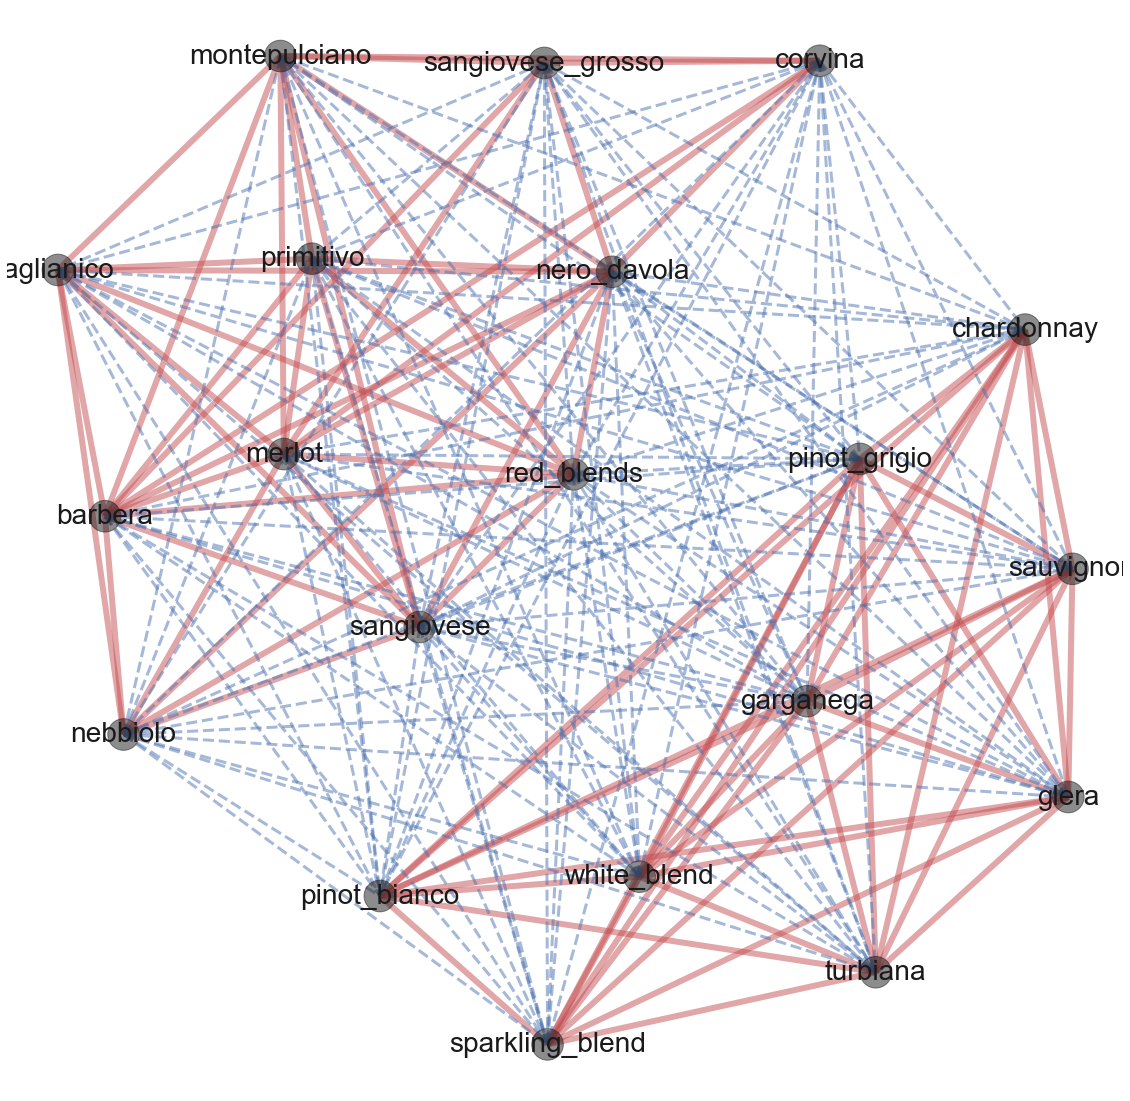

In [1130]:
threshold = 110
elarge = [(u, v) for (u, v, d) in netchart.edges(data=True) if d['weight'] > threshold]
esmall = [(u, v) for (u, v, d) in netchart.edges(data=True) if d['weight'] <= threshold]
fig, ax = plt.subplots(figsize=(20, 20))
pos = nx.spring_layout(netchart)  # positions for all nodes
nx.draw_networkx_nodes(netchart, pos, node_size=[1000]*10+[1000]*10, alpha=0.5, node_color='k', ax=ax)
nx.draw_networkx_edges(netchart, pos, edgelist=elarge,
                       width=6, alpha=0.5, edge_color='r', ax=ax)
nx.draw_networkx_edges(netchart, pos, edgelist=esmall,
                       width=3, alpha=0.5, edge_color='b', style='dashed', ax=ax)
nx.draw_networkx_labels(netchart, pos, font_size=28, font_family='sans-serif', ax=ax)
plt.axis('off')
plt.show()

In [986]:
netchart.nodes

NodeView(('red_blends', 'nebbiolo', 'sangiovese', 'white_blend', 'corvina', 'pinot_grigio', 'sangiovese_grosso', 'barbera', 'aglianico', 'nero_davola', 'chardonnay', 'sparkling_blend', 'sauvignon', 'garganega', 'glera', 'montepulciano', 'merlot', 'primitivo', 'turbiana', 'pinot_bianco'))

In [794]:
import plotly.offline as py
import plotly.graph_objects as go

In [802]:
print(print(nx.info(netchart)))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 55
Average degree:   7.8571
None


In [105]:
df2.variety1.value_counts().head(20).index

Index(['red_blends', 'nebbiolo', 'sangiovese', 'white_blend', 'corvina',
       'pinot_grigio', 'sangiovese_grosso', 'barbera', 'aglianico',
       'nero_davola', 'chardonnay', 'sparkling_blend', 'sauvignon',
       'garganega', 'glera', 'montepulciano', 'merlot', 'primitivo',
       'turbiana', 'pinot_bianco'],
      dtype='object')

In [106]:
list(df2.variety1.value_counts().head(20).index)

['red_blends',
 'nebbiolo',
 'sangiovese',
 'white_blend',
 'corvina',
 'pinot_grigio',
 'sangiovese_grosso',
 'barbera',
 'aglianico',
 'nero_davola',
 'chardonnay',
 'sparkling_blend',
 'sauvignon',
 'garganega',
 'glera',
 'montepulciano',
 'merlot',
 'primitivo',
 'turbiana',
 'pinot_bianco']

# Part 2: Modelling


# PREDICTING GRAPE VARIETY FROM REVIEWS

In [107]:
X_top_ten= df2.variety1.isin(['nebbiolo','sangiovese','corvina',"pinot_grigio",'sangiovese_grosso',
                'barbera','aglianico',"nero_davola",'chardonnay','sauvignon'])

In [108]:
df2[X_top_ten].review

5        tight and bracing, this opens with aromas of o...
8        aromas of nail polish, vegetable broth and hay...
9        this has subdued aromas of baking spice and a ...
15       aromas of french oak, coconut, menthol and gra...
16       sweet wood spice pervades on the nose, driven ...
                               ...                        
39439    aromas of espresso, dried herbs and baked plum...
39440    this has aromas of underbrush, leather, scorch...
39441    french oak, toasted hazelnut, fragrant purple ...
39443    aromas of forest floor, wild berries and aroma...
39444    this opens with aromas of dark berry, dried he...
Name: review, Length: 19191, dtype: object

In [109]:
df2[X_top_ten].variety1

5          nebbiolo
8          nebbiolo
9          nebbiolo
15         nebbiolo
16       sangiovese
            ...    
39439      nebbiolo
39440      nebbiolo
39441      nebbiolo
39443      nebbiolo
39444      nebbiolo
Name: variety1, Length: 19191, dtype: object

In [110]:
#  X_sub = df2.review[y.isin(df2.variety1.value_counts().head(20).index)]
# y_sub = y[y.isin(df2.variety1.value_counts().head(20).index)]

In [1275]:
X_sub= df2[X_top_ten].review
y_sub= df2[X_top_ten].variety1

In [1276]:
X_sub

5        tight and bracing, this opens with aromas of o...
8        aromas of nail polish, vegetable broth and hay...
9        this has subdued aromas of baking spice and a ...
15       aromas of french oak, coconut, menthol and gra...
16       sweet wood spice pervades on the nose, driven ...
                               ...                        
39439    aromas of espresso, dried herbs and baked plum...
39440    this has aromas of underbrush, leather, scorch...
39441    french oak, toasted hazelnut, fragrant purple ...
39443    aromas of forest floor, wild berries and aroma...
39444    this opens with aromas of dark berry, dried he...
Name: review, Length: 19191, dtype: object

In [1277]:
target_names = y_sub.unique()
target_names

array(['nebbiolo', 'sangiovese', 'chardonnay', 'pinot_grigio',
       'sauvignon', 'aglianico', 'nero_davola', 'barbera', 'corvina',
       'sangiovese_grosso'], dtype=object)

In [1278]:
from sklearn.model_selection import train_test_split

In [1279]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sub, y_sub, test_size=0.2, random_state=1, stratify=y_sub)

In [1280]:
X_train

2700     aromas of mocha, toasted hazelnut and baking s...
29433    evolved notes of coffee, spice and chocolate s...
3175     this opens with aromas of scorched earth, truf...
10129    fermented and aged in barriques, this sauvigno...
10648    aromas of overripe black berries, prune, toast...
                               ...                        
23782    this is a delicious wine with spice overtones ...
3143     intensely fragrant, this opens with aromas of ...
37405    from the beautiful menfi area of southern sici...
30380    aromas of spiced plum, truffle, iris, menthol ...
35219    a whiff of cellar floor, camphor and grilled h...
Name: review, Length: 15352, dtype: object

In [1282]:
# Setting the vectorizer just like we would set a model
cvec = CountVectorizer(stop_words=stop, lowercase=True,
                       strip_accents="unicode", ngram_range=(1, 2))

# Fitting the vectorizer on our training data
cvec.fit(X_train)

CountVectorizer(ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents='unicode')

In [1283]:
X_train

2700     aromas of mocha, toasted hazelnut and baking s...
29433    evolved notes of coffee, spice and chocolate s...
3175     this opens with aromas of scorched earth, truf...
10129    fermented and aged in barriques, this sauvigno...
10648    aromas of overripe black berries, prune, toast...
                               ...                        
23782    this is a delicious wine with spice overtones ...
3143     intensely fragrant, this opens with aromas of ...
37405    from the beautiful menfi area of southern sici...
30380    aromas of spiced plum, truffle, iris, menthol ...
35219    a whiff of cellar floor, camphor and grilled h...
Name: review, Length: 15352, dtype: object

In [1284]:
y_test

4756            sangiovese
10024            sauvignon
9                 nebbiolo
26737    sangiovese_grosso
9827             aglianico
               ...        
18245           sangiovese
30673             nebbiolo
15241             nebbiolo
5721              nebbiolo
25355              corvina
Name: variety1, Length: 3839, dtype: object

In [1285]:
# Transform training data
cvec_mat_train = cvec.transform(X_train)
cvec_mat_test =cvec.transform(X_test)
# words occuring
words = cvec.get_feature_names()
print(words[100:200])
print()
# number of different words
print(len(words))

['absorbing heat', 'absorbs', 'absorbs hefty', 'abundance', 'abundance bright', 'abundance deep', 'abundance energy', 'abundance suggests', 'abundant', 'abundant acidity', 'abundant cherry', 'abundant culminates', 'abundant delicate', 'abundant density', 'abundant mineral', 'abundant peach', 'abundant plush', 'abundant stone', 'abundant tannins', 'abundantly', 'abundantly ripe', 'abv', 'abv detectable', 'abv finish', 'abv notice', 'abv seems', 'acacia', 'acacia almond', 'acacia baked', 'acacia brioche', 'acacia exotic', 'acacia flower', 'acacia flowers', 'acacia fresh', 'acacia hint', 'acacia honey', 'acacia honeysuckle', 'acacia light', 'acacia peach', 'acacia ride', 'acacia ripe', 'acacia spanish', 'acacia textbook', 'acacia yellow', 'acate', 'acate ripe', 'accent', 'accent adds', 'accent also', 'accent back', 'accent black', 'accent bright', 'accent coffee', 'accent core', 'accent cranberry', 'accent crushed', 'accent dark', 'accent dense', 'accent dried', 'accent emphasis', 'accent

In [1286]:
X_train.iloc[70]

'this is a deep wine with rich notes of barbecue, smoke and hickory over black fruit and spice. nothing is overblown or out of proportion and the wine offers solid fruit notes in the mouth backed by good freshness and spice.'

In [1287]:
X_train2 = cvec_mat_train 
y_train2 = y_train
X_test2 = cvec_mat_test 
y_test2 = y_test

In [1288]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', multi_class='ovr',max_iter=10000)
lr.fit(X_train2, y_train2)
print(lr.score(X_train2, y_train2))
print(lr.score(X_test2, y_test2))

0.9985669619593538
0.7374316228184423


In [1294]:
from sklearn import svm, linear_model
from sklearn.svm import SVC, LinearSVC

In [1292]:
clf = svm.SVC(gamma='auto')
print(cross_val_score(clf, X_train2, y_train2, cv=5, scoring='accuracy').mean())

0.315072958441743


In [1293]:
clf = svm.SVC(kernel='linear', decision_function_shape='ovr')
clf.fit(X_train2, y_train2)
print(cross_val_score(clf, X_train2, y_train2, cv=5, scoring='accuracy').mean())

0.7055107727326243


In [1297]:
clf = svm.SVC(kernel='poly', gamma=1)
clf.fit(X_train2, y_train2)
print(cross_val_score(clf, X_train2, y_train2, cv=5, scoring='accuracy').mean())

0.4313443933317565


In [1310]:
clf = svm.SVC(gamma=0.001, C=1)
cross_val_score(clf, X_train2, y_train2, cv=5, scoring='accuracy').mean()

0.5865689644748551

In [1296]:
model_1 = LinearSVC(loss='hinge', max_iter=5000, class_weight='balanced')
model_1.fit(X_train2, y_train2)
cross_val_score(model_1, X_train2, y_train2, cv=5, scoring='accuracy').mean()

0.7055755162564157

In [1147]:
# df_word_frequency = {}
# for i in range(1,20):
#     csum_i = word_counter(cvec_mat3[df2.variety1 == target_names[i], :])

#     df_word_frequency[i] = pd.DataFrame(word_frequency_sorter(
#         words, csum_i), columns=['word', 'frequency'])
#     df_word_frequency[i].set_index('word', inplace=True)
#     print(target_names[i])
#     print(df_word_frequency[i].head(10))
#     print()

In [1148]:
X_train2.shape

(15352, 128118)

In [1149]:
y_train2.shape

(15352,)

In [1150]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def docm(y_true, y_pred, labels=None):
    cm = confusion_matrix(y_true, y_pred)
    if labels is not None:
        cols = ['p_'+c for c in labels]
        df = pd.DataFrame(cm, index=labels, columns=cols)
    else:
        cols = ['p_'+str(i) for i in range(len(cm))]
        df = pd.DataFrame(cm, columns=cols)
    return df

In [1151]:
docm(y_test2, lr.predict(X_test2), labels=target_names)

p_nebbiolo  p_sangiovese  p_chardonnay  p_pinot_grigio  \
nebbiolo                   46             4             0               2   
sangiovese                  1            88             0               9   
chardonnay                  0             0            71               0   
pinot_grigio                3             4             0             255   
sauvignon                   2             8             2              10   
aglianico                   3            13             0               7   
nero_davola                 0             0            31               0   
barbera                     6            18             2              14   
corvina                     2             6             0               6   
sangiovese_grosso           0             0             6               0   

                   p_sauvignon  p_aglianico  p_nero_davola  p_barbera  \
nebbiolo                    30            6              1         38   
sangiovese                  30            9              1         68   
chardonnay                   3            0             49          4   
pinot_grigio                16            3              1         20   
sauvignon                 1014            2              1        162   
aglianico                   16           50              4         36   
nero_davola                  0            0            254          5   
barbera                    208           19              8        770   
corvina                     25            0              0         17   
sangiovese_grosso            0            0             20          1   

                   p_corvina  p_sangiovese_grosso  
nebbiolo                   4                    0  
sangiovese                 1                    0  
chardonnay                 0                    1  
pinot_grigio               5                    0  
sauvignon                  8                    0  
aglianico                  1                    0  
nero_davola                0                    7  
barbera                   19                    0  
corvina                  205                    0  
sangiovese_grosso          0                   78

In [1152]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

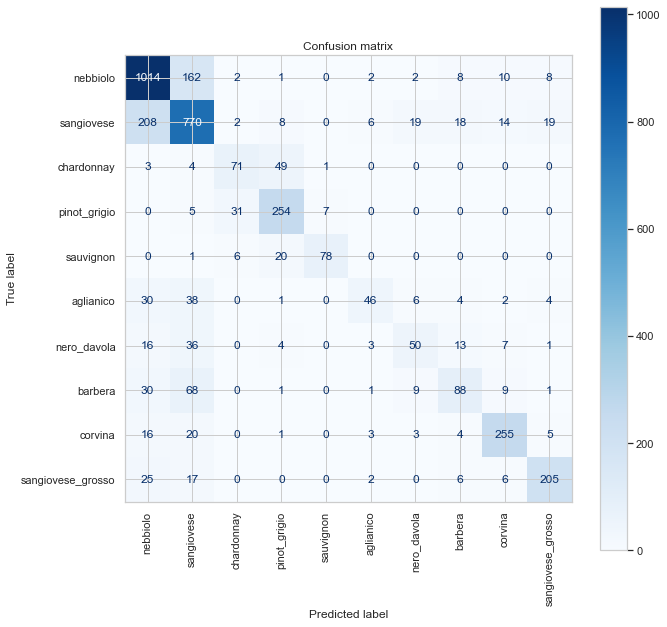

In [1179]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(lr, X_test2, y_test2, cmap='Blues',
                      labels=target_names, values_format='.0f',
                      normalize=None, xticks_rotation= 'vertical',ax=ax)
plt.title('Confusion matrix')
plt.show()

In [130]:
print(classification_report(y_test2, lr.predict(
    X_test2)))

                   precision    recall  f1-score   support

        aglianico       0.73      0.35      0.47       131
          barbera       0.62      0.43      0.51       207
       chardonnay       0.63      0.55      0.59       128
          corvina       0.84      0.83      0.84       307
         nebbiolo       0.76      0.84      0.79      1209
      nero_davola       0.56      0.38      0.46       130
     pinot_grigio       0.75      0.86      0.80       297
       sangiovese       0.69      0.72      0.70      1064
sangiovese_grosso       0.84      0.79      0.81       261
        sauvignon       0.91      0.74      0.82       105

         accuracy                           0.74      3839
        macro avg       0.73      0.65      0.68      3839
     weighted avg       0.73      0.74      0.73      3839



In [135]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [136]:
scaler = MinMaxScaler()
model = LogisticRegression(max_iter=100000)
tvec= TfidfVectorizer(stop_words=stop,
#                                       sublinear_tf=True,
                                      max_df=0.3,
                                      max_features=10000,
                                      norm='l2'
          )
pipe = Pipeline(steps=[('tvec', tvec),
#     ('scaler', scaler),
                       ('model', model),
                      ])
params = {'model__C': np.logspace(-4, 4, 10),
          'model__solver':['liblinear','saga'],
          'model__penalty':['l1','l2'],
          'model__fit_intercept':['True','False'],
          'model__multi_class':['ovr','multinomial']}  

gs = GridSearchCV(pipe, params, cv=5, n_jobs=-2, verbose=1)

gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))

# y_pred = model.predict(X_test)
# print(accuracy_score(y_test, y_pred))
# # print("Number of features:",len(target_names))

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-2)]: Done 428 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-2)]: Done 778 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-2)]: Done 800 out of 800 | elapsed:  3.3min finished


{'model__C': 2.782559402207126, 'model__fit_intercept': 'True', 'model__multi_class': 'ovr', 'model__penalty': 'l2', 'model__solver': 'liblinear'}
0.7253774884731283
0.8446456487754038
0.7324824172961709


In [137]:
scaler = MinMaxScaler()
model = LogisticRegression(max_iter=100000)
cvec = CountVectorizer(stop_words=stop, lowercase=True,
                       strip_accents="unicode", ngram_range=(1, 2))
pipe = Pipeline(steps=[('cvec', cvec),
#     ('scaler', scaler),
                       ('model', model),
                      ])
params = {'model__C': np.logspace(-4, 4, 10),
#           'model__solver':['liblinear','saga'],
          'model__penalty':['l1','l2'],
#           'model__fit_intercept':['True','False'],
          'model__multi_class':['ovr','multinomial']}  

gs = GridSearchCV(pipe, params, cv=5, n_jobs=-2, verbose=1)

gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed: 21.4min finished


{'model__C': 0.3593813663804626, 'model__multi_class': 'multinomial', 'model__penalty': 'l2'}
0.7321516720990838
0.9960265763418447
0.7361292003125814


In [138]:
gs.best_params_ 

{'model__C': 0.3593813663804626,
 'model__multi_class': 'multinomial',
 'model__penalty': 'l2'}

In [139]:
lr= LogisticRegression(max_iter=100000,penalty='l2',multi_class='multinomial',C = 0.3593)
cvec_coef = CountVectorizer(stop_words=stop, lowercase=True,
                       strip_accents="unicode", ngram_range=(1, 2))
pipe = Pipeline(steps=[('cvec', cvec_coef),
#     ('scaler', scaler),
                       ('model',lr),
                      ])
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.9960265763418447
0.7361292003125814


In [368]:
len(pipe.classes_)

10

In [369]:
coefficients = pipe.named_steps['model'].coef_
coefficients

array([[-3.46432820e-05, -3.46432820e-05, -5.08981086e-04, ...,
        -8.20103785e-05, -3.27929928e-03, -3.27929928e-03],
       [-1.33555824e-04, -1.33555824e-04, -1.48711861e-03, ...,
        -7.27051667e-04, -3.00873630e-03, -3.00873630e-03],
       [-8.45053482e-06, -8.45053482e-06,  3.55641175e-02, ...,
        -3.89733483e-04, -7.57627609e-05, -7.57627609e-05],
       ...,
       [ 1.53111857e-03,  1.53111857e-03,  2.28242440e-02, ...,
        -2.84136796e-04, -5.55964207e-04, -5.55964207e-04],
       [-1.62915161e-04, -1.62915161e-04, -1.66916621e-02, ...,
        -1.12174035e-03, -1.17693495e-04, -1.17693495e-04],
       [-1.47451774e-05, -1.47451774e-05, -3.36753415e-03, ...,
        -5.24299140e-04, -5.29580194e-05, -5.29580194e-05]])

In [370]:
fn = pipe.named_steps['cvec'].get_feature_names()
len(fn)

128118

In [371]:
list(zip(fn,coefficients[0]))

[('abarbanel', -3.464328204091615e-05),
 ('abarbanel company', -3.464328204091615e-05),
 ('abate', -0.0005089810860901623),
 ('abate fetel', -0.000208044927566234),
 ('abate subzone', -0.00030093615852392805),
 ('abated', -0.0008995561213170001),
 ('abated smooth', -0.0008995561213170001),
 ('abbey', -0.009940187131943778),
 ('abbey annunziata', -0.00990600719793056),
 ('abbey crowns', -3.4179934013251255e-05),
 ('abbonas', -0.004227576019347784),
 ('abbonas dogliani', -0.004227576019347784),
 ('ability', 0.04750158498033518),
 ('ability age', -0.0005660538861679348),
 ('ability cut', 0.06447451004897609),
 ('ability imported', -0.0002596221256990718),
 ('ability pair', -0.011537574438597233),
 ('ability slide', -0.004609674618176911),
 ('able', 0.038880704406415494),
 ('able enjoy', -0.010103304767964527),
 ('able highlight', -7.32685856563829e-05),
 ('able linger', 0.04926102492768702),
 ('able make', -0.0002037471676507048),
 ('abound', -0.012162112756498618),
 ('abound dark', -0.00

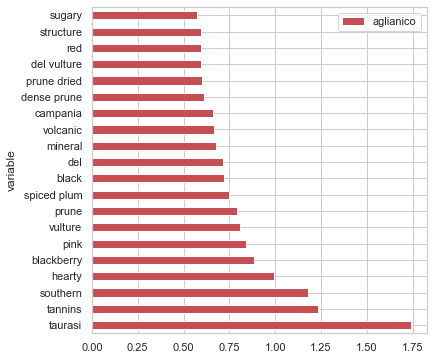

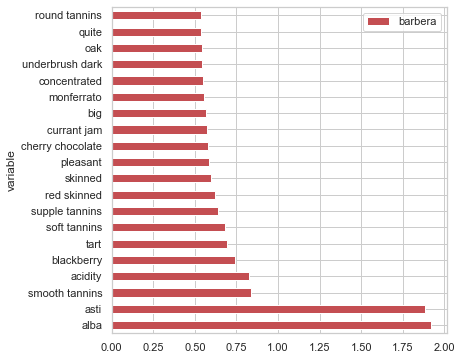

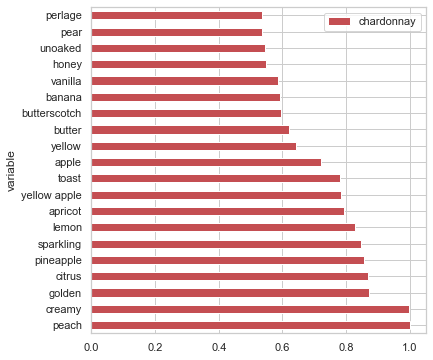

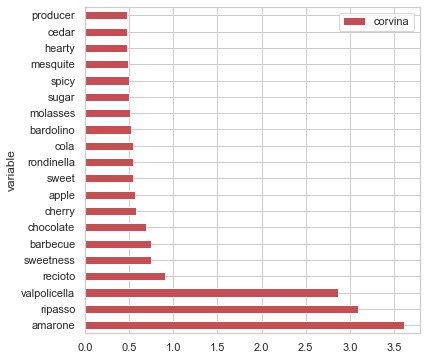

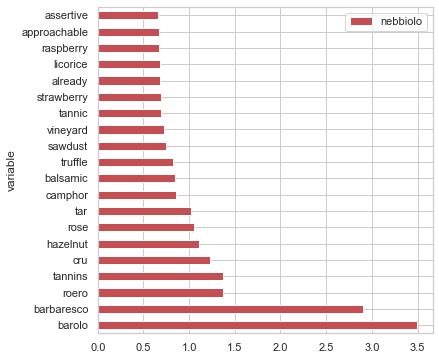

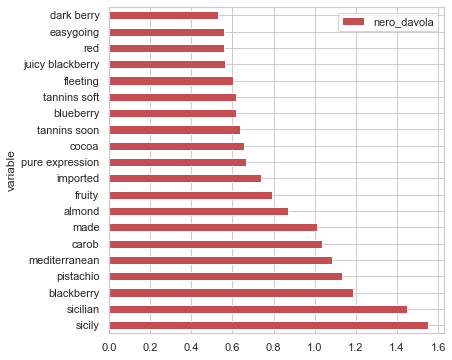

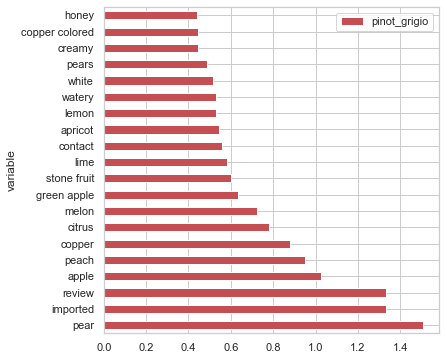

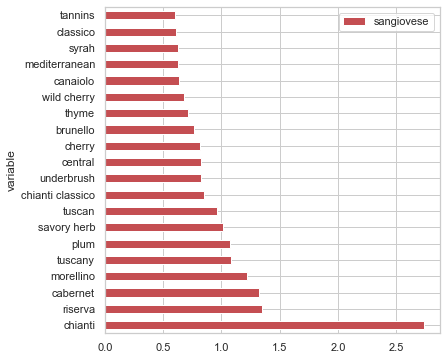

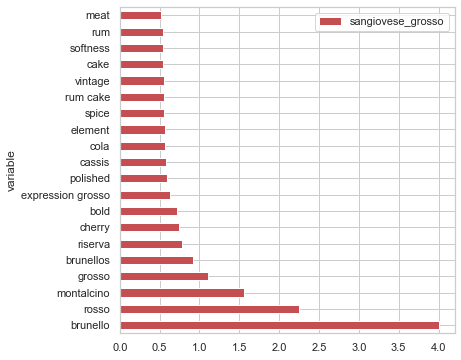

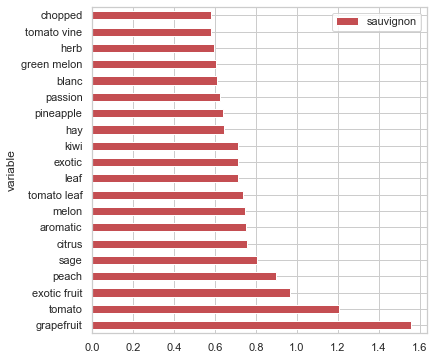

In [1218]:
for i in range(len(pipe.classes_)):
    
    coefs_vars_ridge = pd.DataFrame({
        'coef': coefficients[i],
        'variable': fn,
        'abscoef': np.abs(coefficients[i]),
        'grape_variety' : pipe.classes_[i],
    })
    coefs_vars_ridge.sort_values('coef', ascending=False, inplace=True)
    coefs_vars_ridge[:20].plot(kind='barh', x='variable', y='coef',
                          color='r', figsize=(6, 6), label=pipe.classes_[i])
    plt.show()

In [399]:
pipe.classes_

array(['aglianico', 'barbera', 'chardonnay', 'corvina', 'nebbiolo',
       'nero_davola', 'pinot_grigio', 'sangiovese', 'sangiovese_grosso',
       'sauvignon'], dtype=object)

In [456]:
coefs_vars_ridge0 = pd.DataFrame({
    'coef': coefficients[0],
    'variable': fn,
    'abscoef': np.abs(coefficients[0]),
    'grape_variety' : pipe.classes_[0],
})
coefs_vars_ridge0.sort_values('coef', ascending=False, inplace=True)
agl=pd.DataFrame(coefs_vars_ridge0[coefs_vars_ridge0['grape_variety'] == 'aglianico'].sort_values(
'coef', ascending = False).head(20))
agl_=dict(agl[['variable','coef']].values)


In [455]:
coefs_vars_ridge1 = pd.DataFrame({
    'coef': coefficients[1],
    'variable': fn,
    'abscoef': np.abs(coefficients[1]),
    'grape_variety' : pipe.classes_[1],
})
coefs_vars_ridge1.sort_values('coef', ascending=False, inplace=True)
barb=pd.DataFrame(coefs_vars_ridge1[coefs_vars_ridge1['grape_variety'] == 'barbera'].sort_values(
'coef', ascending = False).head(20))
barb_=dict(barb[['variable','coef']].values)


In [454]:
coefs_vars_ridge2 = pd.DataFrame({
    'coef': coefficients[2],
    'variable': fn,
    'abscoef': np.abs(coefficients[2]),
    'grape_variety' : pipe.classes_[2],
})
coefs_vars_ridge2.sort_values('coef', ascending=False, inplace=True)
char=pd.DataFrame(coefs_vars_ridge2[coefs_vars_ridge2['grape_variety'] == 'chardonnay'].sort_values(
'coef', ascending = False).head(20))
char_=dict(char[['variable','coef']].values)


In [453]:
coefs_vars_ridge3 = pd.DataFrame({
    'coef': coefficients[3],
    'variable': fn,
    'abscoef': np.abs(coefficients[3]),
    'grape_variety' : pipe.classes_[3],
})
coefs_vars_ridge3.sort_values('coef', ascending=False, inplace=True)
corv=pd.DataFrame(coefs_vars_ridge3[coefs_vars_ridge3['grape_variety'] == 'corvina'].sort_values(
'coef', ascending = False).head(20))
corv_=dict(corv[['variable','coef']].values)


In [452]:
coefs_vars_ridge4 = pd.DataFrame({
    'coef': coefficients[4],
    'variable': fn,
    'abscoef': np.abs(coefficients[4]),
    'grape_variety' : pipe.classes_[4],
})
coefs_vars_ridge4.sort_values('coef', ascending=False, inplace=True)
neb=pd.DataFrame(coefs_vars_ridge4[coefs_vars_ridge4['grape_variety'] == 'nebbiolo'].sort_values(
'coef', ascending = False).head(20))
neb_=dict(neb[['variable','coef']].values)


In [451]:
coefs_vars_ridge5 = pd.DataFrame({
    'coef': coefficients[5],
    'variable': fn,
    'abscoef': np.abs(coefficients[5]),
    'grape_variety' : pipe.classes_[5],
})
coefs_vars_ridge5.sort_values('coef', ascending=False, inplace=True)
ner=pd.DataFrame(coefs_vars_ridge5[coefs_vars_ridge5['grape_variety'] == 'nero_davola'].sort_values(
'coef', ascending = False).head(20))
ner_=dict(ner[['variable','coef']].values)


In [449]:
coefs_vars_ridge6 = pd.DataFrame({
    'coef': coefficients[6],
    'variable': fn,
    'abscoef': np.abs(coefficients[6]),
    'grape_variety' : pipe.classes_[6],
})
coefs_vars_ridge6.sort_values('coef', ascending=False, inplace=True)
ping=pd.DataFrame(coefs_vars_ridge6[coefs_vars_ridge6['grape_variety'] == 'pinot_grigio'].sort_values(
'coef', ascending = False).head(20))
ping_=dict(ping[['variable','coef']].values)


In [450]:
coefs_vars_ridge7 = pd.DataFrame({
    'coef': coefficients[7],
    'variable': fn,
    'abscoef': np.abs(coefficients[7]),
    'grape_variety' : pipe.classes_[7],
})
coefs_vars_ridge7.sort_values('coef', ascending=False, inplace=True)
sang=pd.DataFrame(coefs_vars_ridge7[coefs_vars_ridge7['grape_variety'] == 'sangiovese'].sort_values(
'coef', ascending = False).head(20))
sang_=dict(sang[['variable','coef']].values)


In [448]:
coefs_vars_ridge9 = pd.DataFrame({
    'coef': coefficients[9],
    'variable': fn,
    'abscoef': np.abs(coefficients[9]),
    'grape_variety' : pipe.classes_[9],
})
coefs_vars_ridge9.sort_values('coef', ascending=False, inplace=True)
sauv=pd.DataFrame(coefs_vars_ridge9[coefs_vars_ridge9['grape_variety'] == 'sauvignon'].sort_values(
'coef', ascending = False).head(20))
sauv_=dict(sauv[['variable','coef']].values)
sauv_

{'grapefruit': 1.5577971218141298,
 'tomato': 1.2077309329538557,
 'exotic fruit': 0.964598511397831,
 'peach': 0.8981984261033533,
 'sage': 0.80332626669965,
 'citrus': 0.757225096606629,
 'aromatic': 0.7543044091994234,
 'melon': 0.7492719888831677,
 'tomato leaf': 0.7364170854130293,
 'leaf': 0.7145170985289566,
 'exotic': 0.7128486406890434,
 'kiwi': 0.7105615351768343,
 'hay': 0.6448002827188651,
 'pineapple': 0.6404903555334017,
 'passion': 0.6238284397001863,
 'blanc': 0.6105893351456726,
 'green melon': 0.6052101494632621,
 'herb': 0.5938281059549242,
 'tomato vine': 0.5812655748468049,
 'chopped': 0.5812500015049543}

# Visualizing Results with Wordcloud

In [285]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Not so typical
import matplotlib.image as image
import matplotlib.colors
from collections import defaultdict
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from IPython.display import Image as im
from os import path

In [1181]:
# mask_orn= np.array(Image.open('../../../../../Downloads/png-format-16140375141575945379ornellaia.png'))
# mask_orn

In [562]:
# def transform_format_orn(val):
#     if val > 3:
#         return 255
#     else:
#         return val

In [1180]:
# transformed_mask_orn = np.ndarray((mask_orn.shape[0],mask_orn.shape[1]), np.int32)
# for i in range(len(mask_orn)):
#     transformed_mask_orn[i] = list(map(transform_format_orn, mask_orn[i]))

In [561]:
mask = np.array(Image.open('../../../../../Downloads/bot.png'))
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [554]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [555]:
transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
for i in range(len(mask)):
    transformed_mask[i] = list(map(transform_format, mask[i]))

In [556]:
transformed_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

In [566]:
wcsauv_=WordCloud(background_color="white", contour_color='red',contour_width=4,
             max_words=100, mask=transformed_mask, stopwords=stop,
             colormap='Blues').fit_words(sauv_)
wcping_=WordCloud(background_color="white", contour_color='black',contour_width=3,
             max_words=100, mask=transformed_mask, stopwords=stop,
             colormap='rocket').fit_words(ping_)
wcchar_=WordCloud(background_color="white", contour_color='black',contour_width=3,
             max_words=100, mask=transformed_mask, stopwords=stop,
             colormap='rocket').fit_words(char_)
wcneb_=WordCloud(background_color="white", contour_color='black',contour_width=3,
             max_words=100, mask=transformed_mask, stopwords=stop,
             colormap='rocket').fit_words(neb_)
wcner_=WordCloud(background_color="white", contour_color='black',contour_width=3,
             max_words=100, mask=transformed_mask, stopwords=stop,
             colormap='rocket').fit_words(ner_)
wcsang_=WordCloud(background_color="white", contour_color='black',contour_width=3,
             max_words=100, mask=transformed_mask, stopwords=stop,
             colormap='rocket').fit_words(sang_)

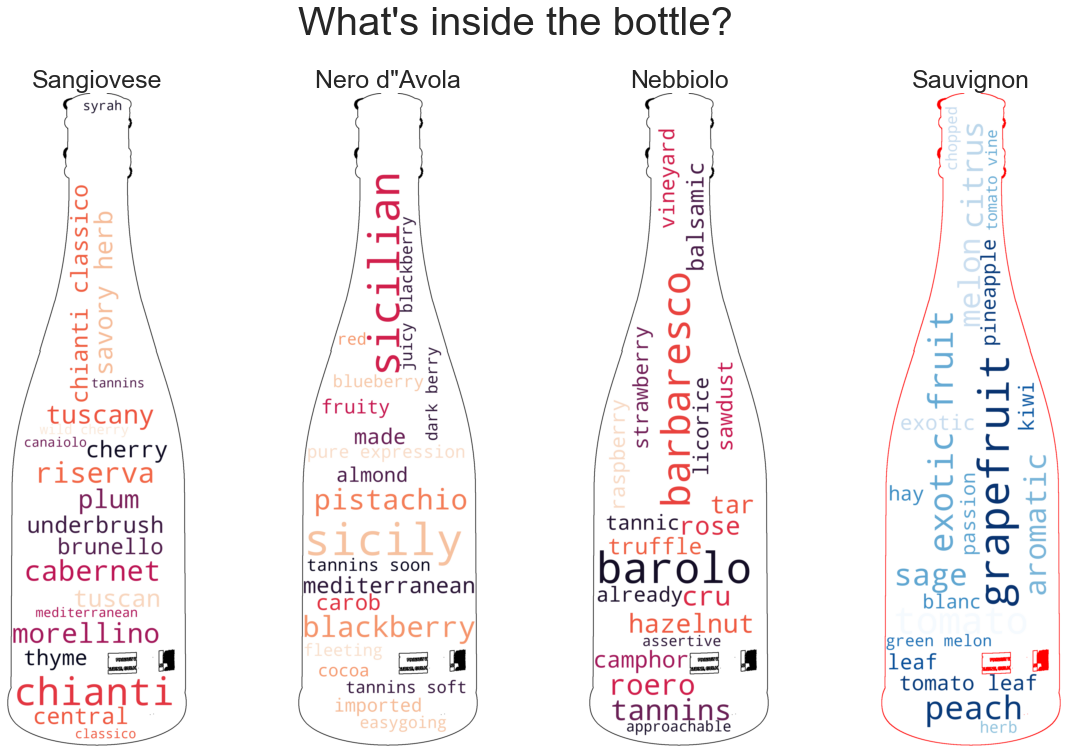

In [1033]:
fig,axs = plt.subplots(1,4,figsize=(20,12),sharex=True,)
fig.suptitle("What's inside the bottle?", fontsize=40)
axs[0].imshow(wcsang_ ,interpolation='bilinear')
axs[1].imshow(wcner_ ,interpolation='bilinear')
axs[2].imshow(wcneb_ ,interpolation='bilinear')
axs[3].imshow(wcsauv_,interpolation='bilinear')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[3].axis('off')
axs[0].set_title('Sangiovese', fontsize=25)
axs[1].set_title('Nero d"Avola',fontsize=25)
axs[2].set_title('Nebbiolo',fontsize=25)
axs[3].set_title('Sauvignon',fontsize=25)
plt.show()

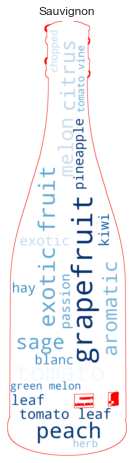

In [567]:
plt.figure(figsize=(6,8))
plt.imshow(wcsauv_ ,interpolation='bilinear')
plt.axis('off')
plt.title('Sauvignon')
plt.show()

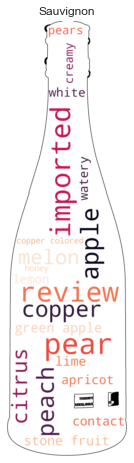

In [633]:
plt.figure(figsize=(6,8))
plt.imshow(wcping_ ,interpolation='bilinear')
plt.axis('off')
plt.title('Sauvignon')
plt.show()

In [320]:
masks = dict()
masks['Italy'] = '/users/giacomo/downloads/it.jpg'

In [ ]:
 mask = np.array(Image.open(mask_image))

In [324]:
def generate_country_wordcloud_from_freq(words, mask_image, filename=None, colormap='jet'):
    mask = np.array(Image.open(mask_image))
    wc = WordCloud(background_color="white", contour_color='black',contour_width=3, max_words=100, mask=mask, stopwords=stop, colormap=colormap)
    wc.generate_from_frequencies(words)
    if filename:
        wc.to_file(filename)
    return wc

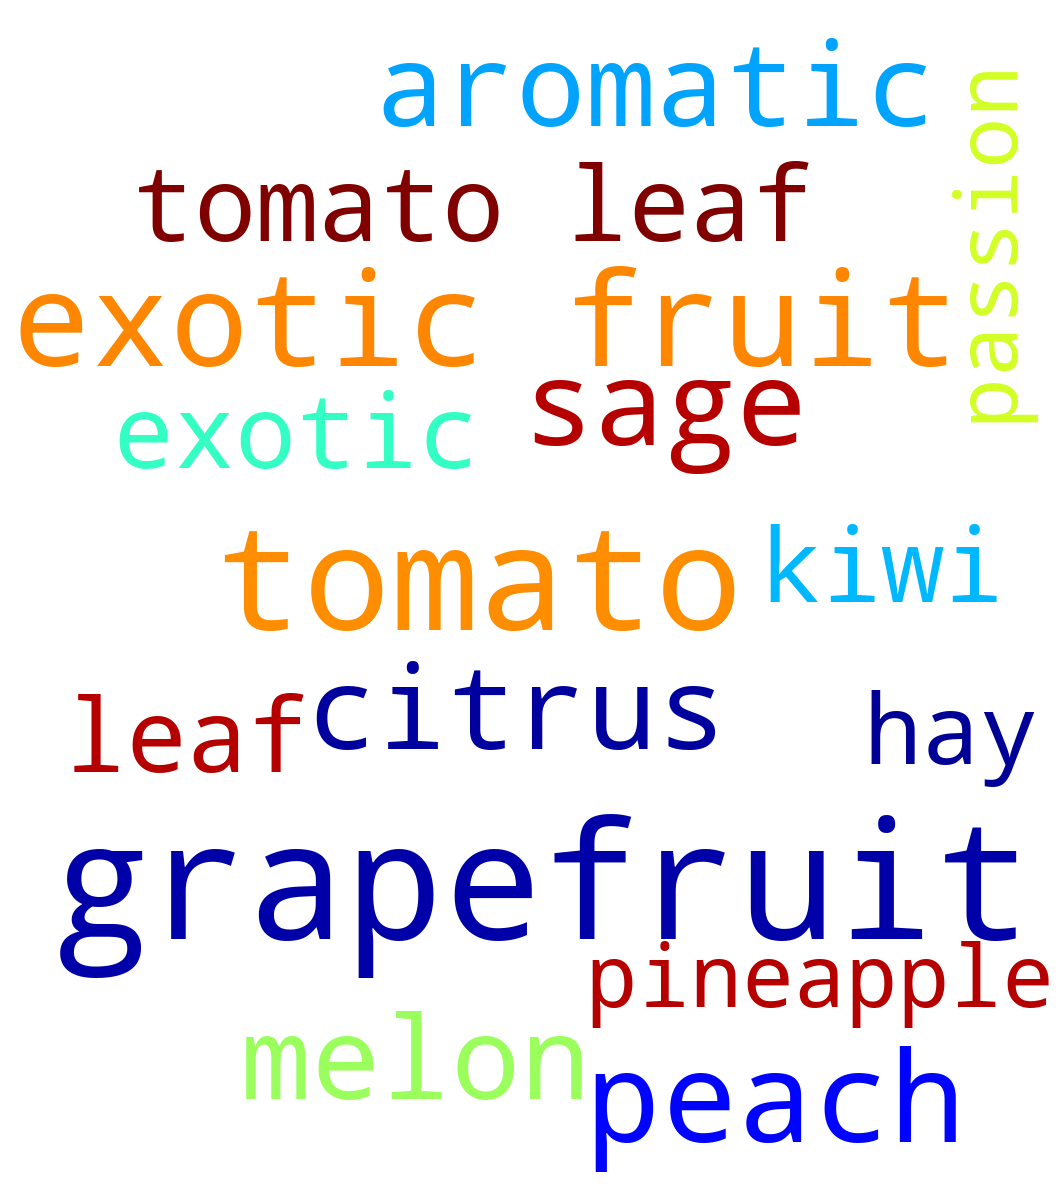

In [325]:
masks = dict()
masks['Italy'] = '/users/giacomo/downloads/it.jpg'
italy_wc = generate_country_wordcloud_from_freq(sa, masks['Italy'], 'it.jpg')
italy_wc.to_image()

In [149]:
from nltk.tokenize import PunktSentenceTokenizer
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
from nltk.tokenize import WordPunctTokenizer
stemmer = PorterStemmer()
sent_detector = PunktSentenceTokenizer()
tok = WordPunctTokenizer()
# tags = dict(pos_tag(tok.tokenize("today is a great day to learn nlp")))
# tags

In [150]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('tagsets')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/giacomo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/giacomo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package tagsets to /Users/giacomo/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package punkt to /Users/giacomo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/giacomo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# import re
# import nltk
# from nltk.corpus import stopwords
# import nltk as nlp
# descriptionList = list()
# lemma = nlp.WordNetLemmatizer()
# for description in df2.review:
# #     description = re.sub("[^a-zA-Z]"," ",description) # We use regular expression to delete non-alphabetic characters on data.
# #     description = description.lower() # Since upper and lower characters are (e.g a - A) evaluated like they are different each other by computer we make turn whole characters into lowercase.
#     description = nltk.word_tokenize(description) # We tokenized the statement
#     description = [i for i in description if not i in set(stopwords.words("english"))] # We will remove words like 'the', 'or', 'and', 'is' etc.
#     description = [lemma.lemmatize(i)for i in description] # e.g: loved => love
#     description = " ".join(description) # Now we turn our words list into sentence again
#     descriptionList.append(description)
# from sklearn.feature_extraction.text import CountVectorizer
# # We try to use most common 1500 words to make a prediction.
# max_features = 200
# count_vectorizer = CountVectorizer(max_features=max_features) 
# sparce_matrix = count_vectorizer.fit_transform(descriptionList)
# sparce_matrix = sparce_matrix.toarray()
# x = X_sub
# y = y_sub
# from sklearn.model_selection import train_test_split
# x_train5, x_test5, y_train5, y_test5 = train_test_split(x, y, test_size = 0.3, random_state = 42)
# from sklearn.naive_bayes import GaussianNB
# nb = GaussianNB()
# nb.fit(x_train5, y_train5)
# # Prediction
# y_pred = nb.predict(x_test5)
# print("Accuracy: {:.2f}%".format(nb.score(y_pred.reshape(-1,1), y_test)*100))

# PREDICTING ABOVE OR BELOW AVERAGE RATING FROM REVIEWS

In [1182]:
X_good = df2[X_top_ten].review
y_good = df2[X_top_ten].above_below_median_rating

In [1183]:
X_train, X_test, y_train, y_test = train_test_split(
    X_good, y_good, test_size=0.2, random_state=1, stratify=y_good)

In [1184]:
target_names2 = y_good.unique()
target_names2

array([0, 1])

In [1185]:
# Setting the vectorizer just like we would set a model
cvec_good = CountVectorizer(stop_words=stop, lowercase=True,
                       strip_accents="unicode", ngram_range=(1, 2))

# Fitting the vectorizer on our training data
cvec_good.fit(X_train)

CountVectorizer(ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents='unicode')

In [1186]:
# Transform training data
cvec_mat_train_good = cvec_good.transform(X_train)
cvec_mat_test_good =cvec_good.transform(X_test)
# words occuring
words_good = cvec_good.get_feature_names()


In [1187]:
X_train_good = cvec_mat_train_good
y_train_good = y_train
X_test_good = cvec_mat_test_good
y_test_good = y_test

In [1188]:

lr = LogisticRegression(solver='lbfgs',max_iter=10000)
lr.fit(X_train_good, y_train_good)
print(lr.score(X_train_good, y_train_good))
print(lr.score(X_test_good, y_test_good))

0.9986321000521104
0.8426673612920031


In [ ]:
# check confusion matrix and do cv

In [214]:
gs_params = {'penalty': ['l1', 'l2'],
                   'solver': ['liblinear','lbfgs'],
                   'C': np.logspace(-4, 4, 9)}
gs = GridSearchCV(lr, gs_params, cv=5, n_jobs=-2, verbose=1)
gs.fit(X_train_good, y_train_good)
print(gs.best_params_)
print(gs.best_score_)
print(gs.score(X_test_good,y_test_good))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-2)]: Done 180 out of 180 | elapsed:  2.2min finished


{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.8402173744719171
0.8470955978119302


In [215]:
gs.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [1189]:
lr_best = LogisticRegression(solver='liblinear',max_iter=10000, C = 0.1, penalty= 'l2' )
lr_best.fit(X_train_good, y_train_good)
print(lr.score(X_train_good, y_train_good))
print(lr.score(X_test_good, y_test_good))

0.9986321000521104
0.8426673612920031


In [1190]:
lr_best.coef_

array([[-0.01048873, -0.01048873,  0.02222231, ..., -0.01788089,
         0.00728881,  0.00728881]])

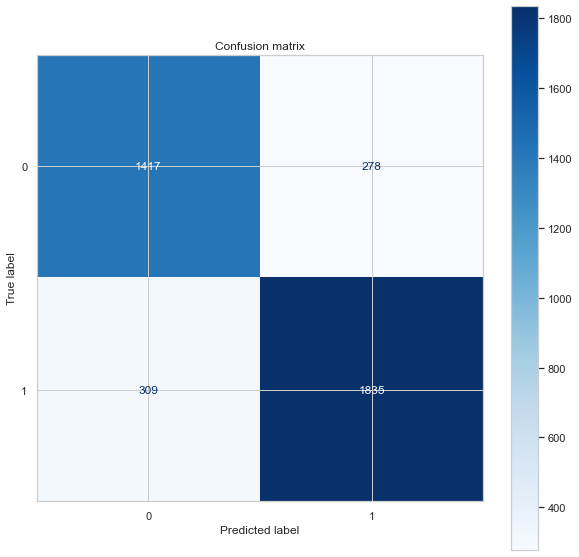

In [1193]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(lr_best, X_test_good, y_test_good, cmap='Blues',
                      labels=target_names2, values_format='.0f',
                      normalize=None, xticks_rotation= 'horizontal',ax=ax)
plt.title('Confusion matrix')
plt.show()

In [218]:
words_good 

['abarbanel',
 'abarbanel company',
 'abate',
 'abate fetel',
 'abate subzone',
 'abate ten',
 'abbey',
 'abbey annunziata',
 'abbonas',
 'abbonas dogliani',
 'ability',
 'ability age',
 'ability bouquet',
 'ability cut',
 'ability develop',
 'ability imported',
 'ability pair',
 'ability slide',
 'able',
 'able enjoy',
 'able highlight',
 'able linger',
 'abound',
 'abound big',
 'abound dark',
 'abound delicious',
 'abound elegantly',
 'abound enormous',
 'abound fragrant',
 'abound full',
 'abound immediately',
 'abound soulful',
 'abound trentino',
 'abounds',
 'abounds ripe',
 'abrasive',
 'abrasive astringent',
 'abrasive tannins',
 'abrasive texture',
 'abrasive wood',
 'abrigo',
 'abrigo consistently',
 'abrigo particularly',
 'abrigo treiso',
 'abroad',
 'abroad bursts',
 'abroad monte',
 'abrupt',
 'abrupt astringent',
 'abrupt bitter',
 'abrupt drying',
 'abrupt extremely',
 'abrupt finish',
 'abrupt lean',
 'abrupt marked',
 'abrupt mouthdrying',
 'abrupt raspy',
 'abrupt s

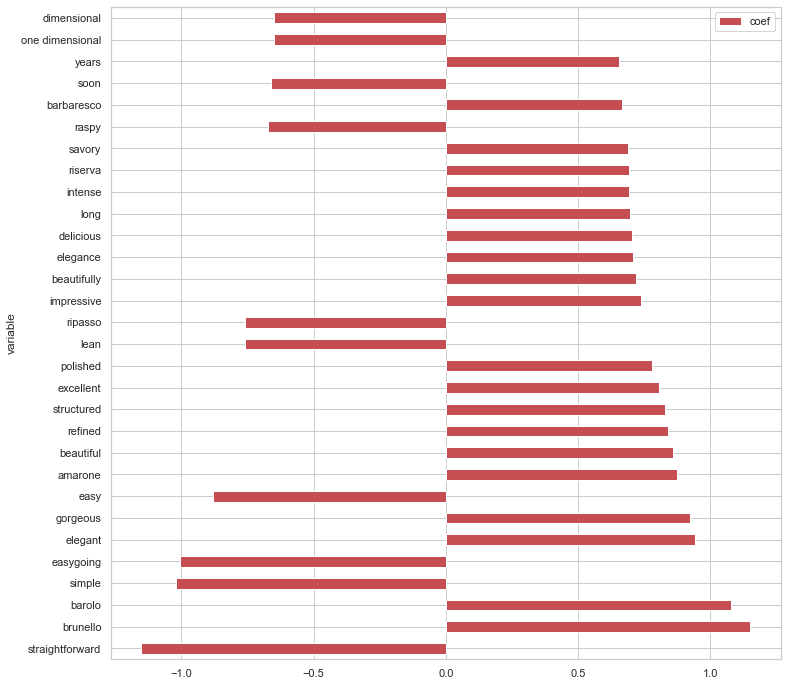

In [1195]:
coefs_binary = pd.DataFrame({
    'coef': lr_best.coef_[0],
    'variable': words_good ,
    'abscoef': np.abs(lr_best.coef_[0]),

})
coefs_binary.sort_values('abscoef', ascending=False, inplace=True)
coefs_binary[:30].plot(kind='barh', x='variable', y='coef',
                      color='r', figsize=(12, 12))
plt.show()

# PREDICINTG RATINGS FROM REVIEWS

In [1260]:
X_rat = df2[X_top_ten].review
y_rat = df2[X_top_ten].rating

In [1261]:
X_train, X_test, y_train, y_test = train_test_split(
    X_rat, y_rat, test_size=0.2, random_state=1, stratify=y_rat)

In [1262]:
# Setting the vectorizer just like we would set a model
cvec_rat = CountVectorizer(stop_words=stop, lowercase=True,
                       strip_accents="unicode", ngram_range=(1, 2))

# Fitting the vectorizer on our training data
cvec_rat.fit(X_train)

CountVectorizer(ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents='unicode')

In [1263]:
cvec_mat_train_rat = cvec_rat.transform(X_train)
cvec_mat_test_rat =cvec_rat.transform(X_test)
# words occuring
words_rat = cvec_rat.get_feature_names()

In [1264]:
X_train_rat = cvec_mat_train_rat
y_train_rat = y_train
X_test_rat = cvec_mat_test_rat
y_test_rat = y_test

In [1265]:
X_train

21928    here's a lovely rosé from southern italy made ...
2606     heady aromas of ripe black-skinned berry, blue...
32588    this presents inviting aromas of underbrush, t...
3525     rose, forest-berry, underbrush and new leather...
14853    this boasts violet, red-skinned berry and whit...
                               ...                        
36985    neutral on the nose with smoked ham and dark l...
38165    giacosa fratelli (to be distinguished from the...
23201    with the whimsical fantasy name “mock,” this n...
26269    barolo lorens offers a hearty, meaty expressio...
33588    this opens with aromas of mature yellow apple,...
Name: review, Length: 15352, dtype: object

In [1266]:
X_train_rat.shape

(15352, 127754)

In [1267]:
y_train_rat.shape

(15352,)

In [1268]:
X_test_rat.shape

(3839, 127754)

In [1269]:
y_test_rat.shape

(3839,)

In [1270]:
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
# model = ElasticNetCV(max_iter=100000)

In [1271]:
model.get_params()

{'alpha': 21.54434690031882,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [1272]:
model = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5)
# fit the model
model.fit(X_train_rat, y_train_rat)
# get the best alpha
print('Best alpha:', model.alpha_)
# evaluate on the training set
print('Training score:', model.score(X_train_rat, y_train_rat))
# evaluate on the test set
print("Test Score:", model.score(X_test_rat, y_test_rat))

Best alpha: 21.54434690031882
Training score: 0.9284775341071984
Test Score: 0.7529094206235655


In [1273]:
alpha = model.alpha_
# create a Ridge model instance
model = Ridge(alpha= alpha)
# get cross validated scores
scores = cross_val_score(model, X_train_rat, y_train_rat, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train_rat, y_train_rat)
print("Training Score:", model.score(X_train_rat, y_train_rat))
# evaluate the data on the test set
print("Test Score:", model.score(X_test_rat, y_test_rat))


Cross-validated training scores: [0.75137214 0.7352729  0.7525659  0.75434824 0.74688672]
Mean cross-validated training score: 0.7480891793700428
Training Score: 0.9284775341071984
Test Score: 0.7529094206235655


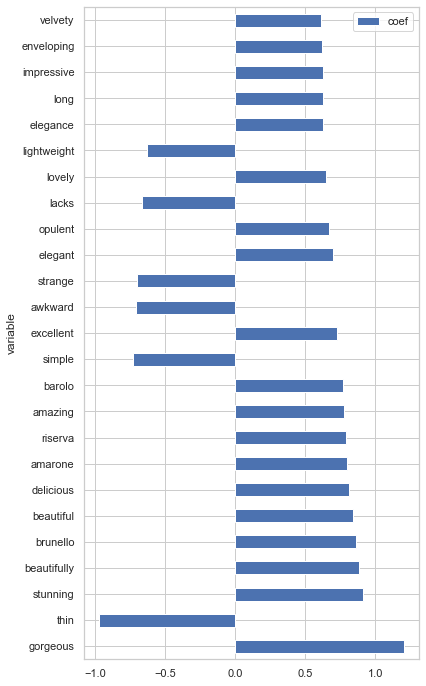

In [1274]:
coefs_ridge_ratfromrev = pd.DataFrame({
    'coef': model.coef_,
    'variable': words_rat  ,
    'abscoef': np.abs(model.coef_),

})
coefs_ridge_ratfromrev.sort_values('abscoef', ascending=False, inplace=True)
coefs_ridge_ratfromrev[:25].plot(kind='barh', x='variable', y='coef',
                      color='b', figsize=(6, 12))
plt.show()

In [484]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [485]:
model = RandomForestRegressor()

In [4]:
# params = { #'n_estimators': [1,10],
#           'max_depth': [50,100]
# #           ,'min_samples_leaf':[1,3]
                             
#  }

# gs = GridSearchCV(model, param_grid=params, cv=5, n_jobs=-1)
# gs.fit(X_train_rat, y_train_rat)

# model = gs.best_estimator_
# print(gs.best_estimator_)
# print('R2 training: ', gs.score(X_train_rat, y_train_rat))
# print('R2 CV training: ', gs.best_score_)
# print('R2 test: ', gs.score(X_test_rat, y_test_rat))

In [1605]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=1)
model = DecisionTreeRegressor(max_depth=3, random_state=1)

model.fit(X_train_rat, y_train_rat)
predictions = model.predict(X_test_rat)

print('Training error: ')
print('MSE: ', mean_squared_error(y_train_rat, model.predict(X_train_rat)))
print('R2: ', r2_score(y_train_rat, model.predict(X_train_rat)))

print('CV training error: ')
print('MSE: ', cross_val_score(model, X_train_rat, y_train_rat,
                                cv=kf, scoring='neg_mean_squared_error').mean())
print('R2: ', cross_val_score(model, X_train_rat, y_train_rat, cv=kf, scoring='r2').mean())


print('Test error: ')
print('MSE: ', mean_squared_error(y_test_rat, predictions))
print('R2: ', r2_score(y_test_rat, predictions))

Training error: 
MSE:  6.716007416301817
R2:  0.22806403630738437
CV training error: 
MSE:  -6.824728487902386
R2:  0.21546319698611463
Test error: 
MSE:  6.91732467878095
R2:  0.2023351072880134


In [1606]:
params = {'max_depth': [ 3, 10, 20, 50],
          # , 'max_features':[1,2,3,4],
          'max_leaf_nodes': [10,50,100],
#           'min_samples_leaf': [1, 2, 3, 4]
          # 'min_samples_split':[1,2,3,4]
          }

gs = GridSearchCV(model, param_grid=params, cv=kf, n_jobs=-2)
gs.fit(X_train_rat, y_train_rat)

model = gs.best_estimator_
print(gs.best_estimator_)
print('R2 training: ', gs.score(X_train_rat, y_train_rat))
print('R2 CV training: ', gs.best_score_)
print('R2 test: ', gs.score(X_test_rat, y_test_rat))

# gs_mse = GridSearchCV(model, param_grid=params, cv=kf,
#                       scoring='neg_mean_squared_error', n_jobs=-2)
# gs_mse.fit(X_train_rat, y_train_rat)

# print(gs_mse.best_estimator_)
# print('MSE training: ', -gs_mse.score(X_train_rat, y_train_rat))
# print('MSE CV training: ', -gs_mse.cv_results_['mean_test_score'].max())
# print('MSE test: ', -gs_mse.score(X_test_rat, y_test_rat))

# gs_all = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid=params, cv=kf,
#                       scoring=['neg_mean_squared_error', 'r2'], refit='r2', n_jobs=-2)
# gs_all.fit(X_train_rat, y_train_rat)


DecisionTreeRegressor(max_depth=6, max_leaf_nodes=10, random_state=1)
R2 training:  0.2700581317344667
R2 CV training:  0.26549604691332107
R2 test:  0.23539646268686698
DecisionTreeRegressor(max_depth=6, max_leaf_nodes=10, random_state=1)
MSE training:  6.350649835369785
MSE CV training:  6.389980532713734
MSE test:  6.630617652178724


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=1), n_jobs=-2,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4]},
             refit='r2', scoring=['neg_mean_squared_error', 'r2'])

# PREDICTING VALUE FOR MONEY FROM REVIEWS

In [1235]:
vfm_df=df2[df2['value_for_money'] > 0].copy()

In [1236]:
vfm_df.value_for_money.value_counts()

5.800000    459
4.350000    435
4.400000    414
4.833333    354
3.520000    353
           ... 
0.440367      1
1.022989      1
0.518919      1
0.483333      1
1.036145      1
Name: value_for_money, Length: 1735, dtype: int64

In [1237]:
X_vfm = vfm_df[X_top_ten].review
y_vfm = vfm_df[X_top_ten].value_for_money

<ipython-input-1237-167414d786e4>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-1237-167414d786e4>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [1238]:
len(y_vfm)

16495

In [1239]:
len(X_vfm)

16495

In [1240]:
# if I stratify here i get an error

In [1241]:
X_train, X_test, y_train, y_test = train_test_split(
    X_vfm, y_vfm, test_size=0.2, random_state=1)

In [1242]:
# Setting the vectorizer just like we would set a model
cvec_vfm = CountVectorizer(stop_words=stop, lowercase=True,
                       strip_accents="unicode", ngram_range=(1, 2))

# Fitting the vectorizer on our training data
cvec_vfm.fit(X_train)

CountVectorizer(ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents='unicode')

In [1243]:
cvec_mat_train_vfm = cvec_vfm.transform(X_train)
cvec_mat_test_vfm =cvec_vfm.transform(X_test)
# words occuring
words_vfm = cvec_vfm.get_feature_names()

In [1244]:
X_train_vfm = cvec_mat_train_vfm 
y_train_vfm = y_train
X_test_vfm  = cvec_mat_test_vfm 
y_test_vfm  = y_test

In [1245]:
X_train_vfm.shape

(13196, 114233)

In [1246]:
y_train_vfm.shape

(13196,)

In [1247]:
X_test_vfm.shape

(3299, 114233)

In [1248]:
y_test_vfm.shape

(3299,)

In [1249]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [1250]:
model.get_params()

{'alpha': 21.54434690031882,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [1251]:
model = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5)
# fit the model
model.fit(X_train_vfm, y_train_vfm)
# get the best alpha
print('Best alpha:', model.alpha_)
# evaluate on the training set
print('Training score:', model.score(X_train_vfm, y_train_vfm))
# evaluate on the test set
print("Test Score:", model.score(X_test_vfm, y_test_vfm))

Best alpha: 21.54434690031882
Training score: 0.8658841985096608
Test Score: 0.5475345129268594


In [1252]:
alpha = model.alpha_
# create a Ridge model instance
model = Ridge(alpha= alpha)
# get cross validated scores
scores = cross_val_score(model, X_train_vfm, y_train_vfm, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train_vfm, y_train_vfm)
print("Training Score:", model.score(X_train_vfm, y_train_vfm))
# evaluate the data on the test set
print("Test Score:", model.score(X_test_vfm, y_test_vfm))


Cross-validated training scores: [0.54091573 0.54207778 0.53002589 0.54331083 0.53691237]
Mean cross-validated training score: 0.5386485218011035
Training Score: 0.8658841985096608
Test Score: 0.5475345129268594


In [1253]:
ab = model.coef_

In [1254]:
pd.DataFrame(ab).value_counts(ascending=False)

 0.037269    43
-0.017380    37
-0.016313    36
-0.014738    36
-0.014493    35
             ..
 0.010887     1
 0.010886     1
 0.010880     1
 0.010875     1
-0.929905     1
Length: 44400, dtype: int64

In [1255]:
words_vfm[0:10]

['abarbanel',
 'abarbanel company',
 'abate',
 'abate subzone',
 'abate ten',
 'abated',
 'abated smooth',
 'abbey',
 'abbey annunziata',
 'abbey crowns']

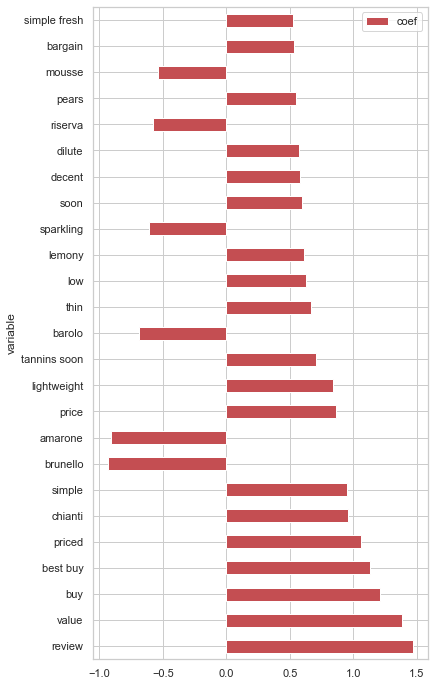

In [1257]:
coefs_ridge = pd.DataFrame({
    'coef': model.coef_,
    'variable': words_vfm  ,
    'abscoef': np.abs(model.coef_),

})
coefs_ridge.sort_values('abscoef', ascending=False, inplace=True)
coefs_ridge[:25].plot(kind='barh', x='variable', y='coef',
                      color='r', figsize=(6, 12))
plt.show()

In [232]:
# create a Lasso model instance
model = Lasso(alpha=alpha)
# get cross validated scores
scores = cross_val_score(model, X_train_vfm, y_train_vfm, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train_vfm, y_train_vfm)
print("Training Score:", model.score(X_train_vfm, y_train_vfm))
# evaluate the data on the test set
print("Test Score:", model.score(X_test_vfm, y_test_vfm))

Cross-validated training scores: [-0.00012215 -0.00019269 -0.00080933 -0.00012908 -0.00019468]
Mean cross-validated training score: -0.0002895858526048123
Training Score: 0.0
Test Score: -7.390558520725676e-08


In [232]:
# model = ElasticNetCV(alphas=np.logspace(-4, 4, 10),
#                      l1_ratio=np.array([0.00001, .1, .5, .7, .9, .95, .99, 1]),
#                      cv=5, max_iter=100000)

In [ ]:
# scores = cross_val_score(model, X_train_vfm, y_train_vfm, cv=5)
# print("Cross-validated training scores:", scores)
# print("Mean cross-validated training score:", scores.mean())
# # fit and evaluate the data on the whole training set
# model.fit(X_train_vfm, y_train_vfm)
# print("Training Score:", model.score(X_train_vfm, y_train_vfm))
# # evaluate the data on the test set
# print("Test Score:", model.score(X_test_vfm, y_test_vfm))

In [198]:
# # get the best alpha
# print('Best alpha:', model.alpha_)
# # get the best l1-ratio
# print('Best l1-ratio:', model.l1_ratio_)

In [513]:
df2.winery.value_counts()

Feudi di San Gregorio    214
Planeta                  187
Tasca d'Almerita         155
Tommasi                  148
Mastroberardino          143
                        ... 
La Pineta                  1
La Querciolina             1
Maretima                   1
Cà Vegar                   1
Già                        1
Name: winery, Length: 3996, dtype: int64

# CAN I PREDICT FINAL JUDGEMENT FROM THE REVIEWS?

In [1196]:
X_fj = df2[X_top_ten].review
y_fj = df2[X_top_ten].final_judgement

In [1197]:
X_train, X_test, y_train, y_test = train_test_split(
    X_fj, y_fj, test_size=0.2, random_state=1, stratify=y_fj)

In [1198]:
target_names3 = y_fj.unique()
target_names3

array(['good', 'superb', 'excellent', 'very_good'], dtype=object)

In [1199]:
# Setting the vectorizer just like we would set a model
cvec_fj = CountVectorizer(stop_words=stop, lowercase=True,
                       strip_accents="unicode", ngram_range=(1, 2))

# Fitting the vectorizer on our training data
cvec_fj.fit(X_train)

CountVectorizer(ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents='unicode')

In [1200]:
# Transform training data
cvec_mat_train_fj = cvec_fj.transform(X_train)
cvec_mat_test_fj =cvec_fj.transform(X_test)
# words occuring
words_fj = cvec_fj.get_feature_names()


In [1201]:
X_train_fj = cvec_mat_train_fj
y_train_fj = y_train
X_test_fj = cvec_mat_test_fj
y_test_fj = y_test

In [1202]:
lr = LogisticRegression(solver='lbfgs',max_iter=10000)
lr.fit(X_train_fj, y_train_fj)
print(lr.score(X_train_fj, y_train_fj))
print(lr.score(X_test_fj, y_test_fj))

0.9992183428869202
0.6045845272206304


In [260]:
gs_params = {'penalty': ['l1', 'l2'],
                   'C': np.logspace(-4, 4, 10)}
gs = GridSearchCV(lr, gs_params, cv=5, n_jobs=-2, verbose=1)
gs.fit(X_train_fj, y_train_fj)
print(gs.best_params_)
print(gs.best_score_)
print(gs.score(X_test_fj,y_test_fj))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed: 14.0min finished


{'C': 0.046415888336127774, 'penalty': 'l2'}
0.6341197946111412
0.6295910393331596


In [1203]:
lr = LogisticRegression(solver='lbfgs',max_iter=10000,penalty='l2',C=0.04641)
lr.fit(X_train_fj, y_train_fj)
print(lr.score(X_train_fj, y_train_fj))
print(lr.score(X_test_fj, y_test_fj))
print(cross_val_score(lr, X_train_fj, y_train_fj, cv=5).mean())

0.8991010943199583
0.6295910393331596
0.6340546480313366


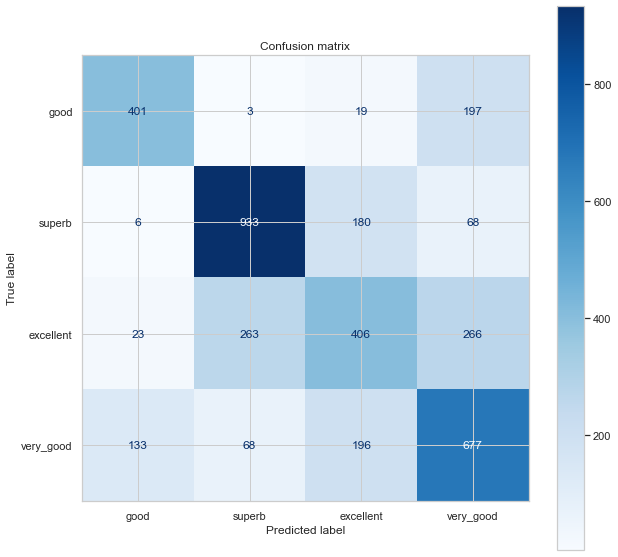

In [1205]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(lr, X_test_fj, y_test_fj, cmap='Blues',
                      labels=target_names3, values_format='.0f',
                      normalize=None, xticks_rotation= 'horizontal',ax=ax)
plt.title('Confusion matrix')
plt.show()

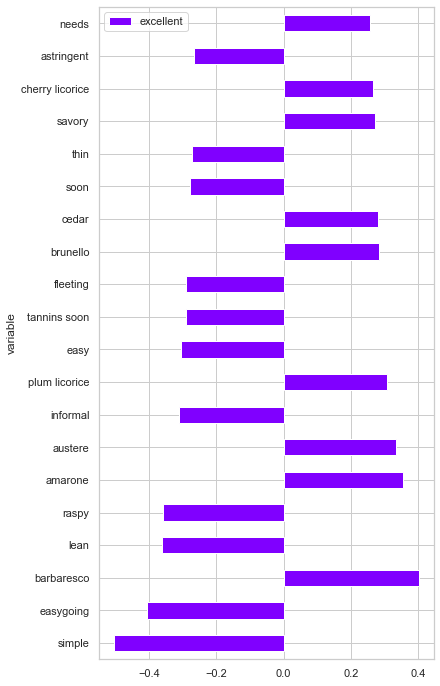

In [1006]:
coefs_ridgefj = pd.DataFrame({
    'coef': lr.coef_[0],
    'variable': words_fj  ,
    'abscoef': np.abs(lr.coef_[0]),

})
coefs_ridgefj.sort_values('abscoef', ascending=False, inplace=True)
coefs_ridgefj[:20].plot(kind='barh', x='variable', y='coef',
                      cmap='rainbow', figsize=(6, 12),label=lr.classes_[0])
plt.show()

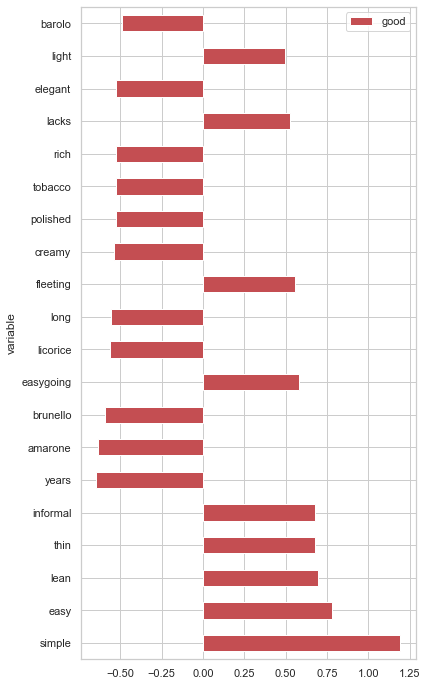

In [510]:
coefs_ridgefj = pd.DataFrame({
    'coef': lr.coef_[1],
    'variable': words_fj  ,
    'abscoef': np.abs(lr.coef_[1]),

})
coefs_ridgefj.sort_values('abscoef', ascending=False, inplace=True)
coefs_ridgefj[:20].plot(kind='barh', x='variable', y='coef',
                      color='r', figsize=(6, 12),label=lr.classes_[1])
plt.show()

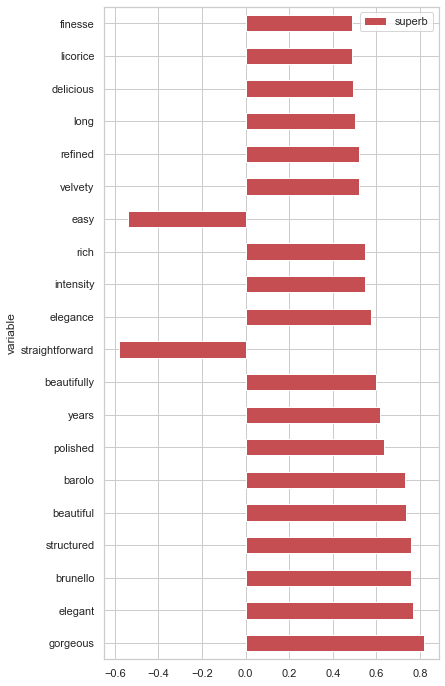

In [511]:
coefs_ridgefj = pd.DataFrame({
    'coef': lr.coef_[2],
    'variable': words_fj  ,
    'abscoef': np.abs(lr.coef_[2]),

})
coefs_ridgefj.sort_values('abscoef', ascending=False, inplace=True)
coefs_ridgefj[:20].plot(kind='barh', x='variable', y='coef',
                      color='r', figsize=(6, 12),label=lr.classes_[2])
plt.show()

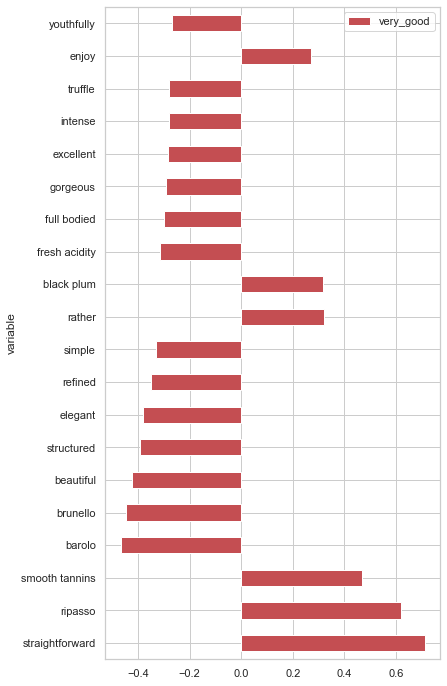

In [512]:
coefs_ridgefj = pd.DataFrame({
    'coef': lr.coef_[3],
    'variable': words_fj  ,
    'abscoef': np.abs(lr.coef_[3]),

})
coefs_ridgefj.sort_values('abscoef', ascending=False, inplace=True)
coefs_ridgefj[:20].plot(kind='barh', x='variable', y='coef',
                      color='r', figsize=(6, 12),label=lr.classes_[3])
plt.show()

# CAN I PREDICT RATING FROM WINERY?

In [526]:
X_dum= pd.get_dummies(df2.winery, drop_first=True)

In [531]:
X_dum.shape


(39419, 3995)

In [532]:
X_rw = X_dum
y_rw = df2.rating

In [533]:
len(X_rw)

39419

In [534]:
len(y_rw)

39419

In [535]:
X_train, X_test, y_train, y_test = train_test_split(
    X_rw, y_rw, test_size=0.2, random_state=1)

In [537]:
model = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5)
# fit the model
model.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model.alpha_)
# evaluate on the training set
print('Training score:', model.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))

Best alpha: 0.3593813663804626
Training score: 0.4734636652948817
Test Score: 0.3462450631109546


In [538]:
alpha = model.alpha_
# create a Ridge model instance
model = Ridge(alpha= alpha)
# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.34214506 0.34397601 0.33855584 0.3529229  0.35311324]
Mean cross-validated training score: 0.34614260940003616
Training Score: 0.4734636652948817
Test Score: 0.3462450631109546


In [ ]:
CAN I PREDICT above/below average RATING FROM the WINERY?

In [543]:
X_hlrw = X_dum
y_hlrw = df2.above_below_median_rating

In [546]:
len(X_hlrw )

39419

In [547]:
len(y_hlrw )

39419

In [551]:
X_train, X_test, y_train, y_test = train_test_split(
    X_hlrw, y_hlrw, test_size=0.2, random_state=1)

In [572]:
len(X_train,)

31535

In [573]:
len(X_test)

7884

In [574]:
len(y_train)

31535

In [575]:
len(y_test)

7884

In [626]:
lr2 = LogisticRegression(solver='lbfgs',max_iter=10000)
lr2.fit(X_train, y_train)
scores = cross_val_score(lr2, X_train, y_train, cv=5)
print("Mean cross-validated training score:", scores.mean())
print('Training Score:', lr2.score(X_train, y_train))
print('Test Score:', lr2.score(X_test, y_test))

Mean cross-validated training score: 0.695512922149992
Training Score: 0.7012842872998256
Test Score: 0.693556570268899


In [578]:
gs_params = {'penalty': ['l1', 'l2'],
                   'C': np.logspace(-4, 4, 10)}
gs = GridSearchCV(lr2, gs_params, cv=5, n_jobs=-2, verbose=1)
gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)
print(gs.score(X_test,y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed: 15.2min finished


{'C': 2.782559402207126, 'penalty': 'l2'}
0.7030283811637863
0.7029426686960933


In [581]:
lr2.classes_

array([0, 1])

In [595]:
lr2.coef_.shape

(1, 3995)

In [598]:
lr2.classes_[1]

1

In [608]:
X_train.columns

Index(['460 Casina Bric', 'A Mano', 'Abbadia Ardenga', 'Abbazia',
       'Abbazia Monte Oliveto', 'Abbazia Santa Anastasia',
       'Abbazia di Novacella', 'Abbona Marziano', 'Abraxas', 'Abrigo',
       ...
       'Zenner', 'Zimòr', 'Ziobaffa', 'Zisola', 'Zonin', 'Zorzettig', 'Zorzon',
       'Zuani', 'Zymè', 'Ïl Macchione'],
      dtype='object', length=3995)

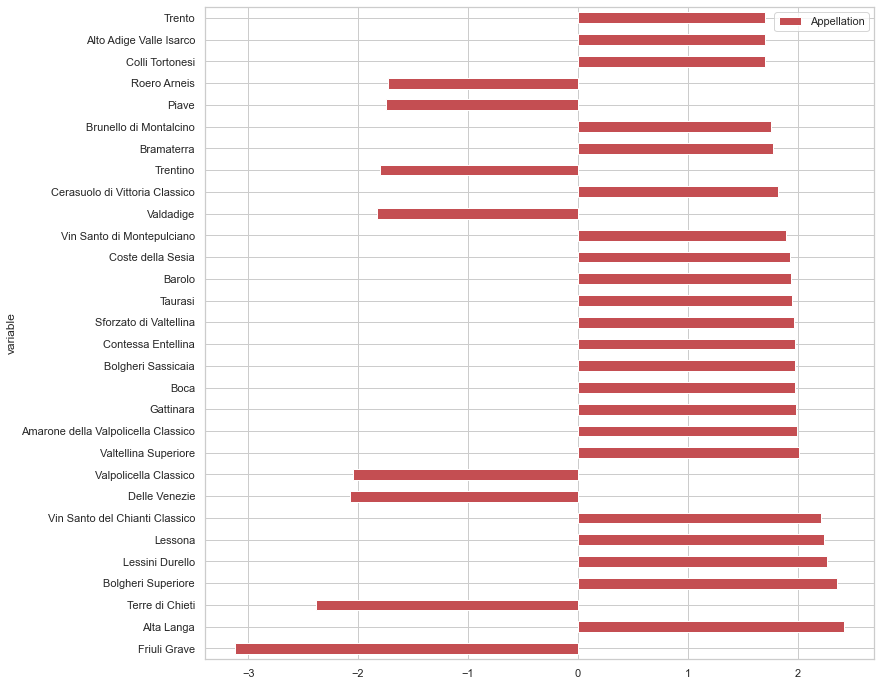

In [628]:
coefs_binary_lr2 = pd.DataFrame({
    'coef': lr2.coef_[0],
    'variable':X_train.columns,
    'abscoef': np.abs(lr2.coef_[0]),

})
coefs_binary_lr2.sort_values('abscoef', ascending=False, inplace=True)
coefs_binary_lr2[:30].plot(kind='barh', x='variable', y='coef',
                      color='r', figsize=(12, 12),label='Appellation')
plt.show()

# PREDICTING ABOVE/BELOW AVERAGE RATING FROM APPELLATION

In [1206]:
X_dum_app= pd.get_dummies(df2.appellation1, drop_first=True)
y_hlapp = y_hlrw

In [1211]:
X_train, X_test, y_train, y_test = train_test_split(
    X_dum_app, y_hlapp, test_size=0.2, random_state=1,stratify=y_hlapp)

In [1212]:
lrapp = LogisticRegression(solver='lbfgs',max_iter=10000)
lrapp.fit(X_train, y_train)
scores = cross_val_score(lrapp, X_train, y_train, cv=5)
print("Mean cross-validated training score:", scores.mean())
print('Training Score:', lrapp.score(X_train, y_train))
print('Test Score:', lrapp.score(X_test, y_test))

Mean cross-validated training score: 0.6927857935627081
Training Score: 0.6989376882828603
Test Score: 0.7056062912227296


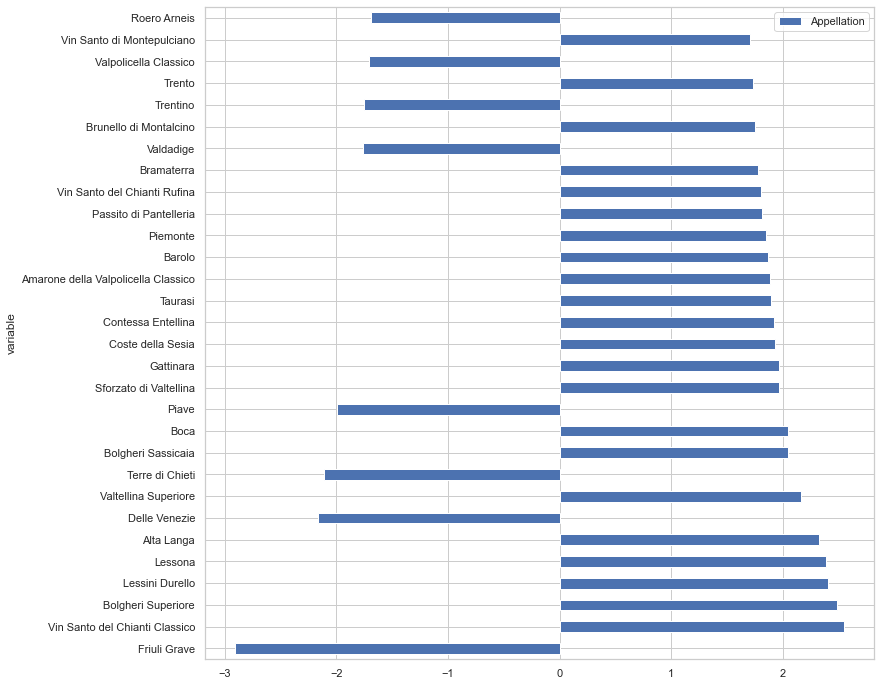

In [1213]:
coefs_binary_lrapp = pd.DataFrame({
    'coef': lrapp.coef_[0],
    'variable':X_train.columns,
    'abscoef': np.abs(lrapp.coef_[0]),

})
coefs_binary_lrapp.sort_values('abscoef', ascending=False, inplace=True)
coefs_binary_lrapp[:30].plot(kind='barh', x='variable', y='coef',
                      color='b', figsize=(12, 12),label='Appellation')
plt.show()

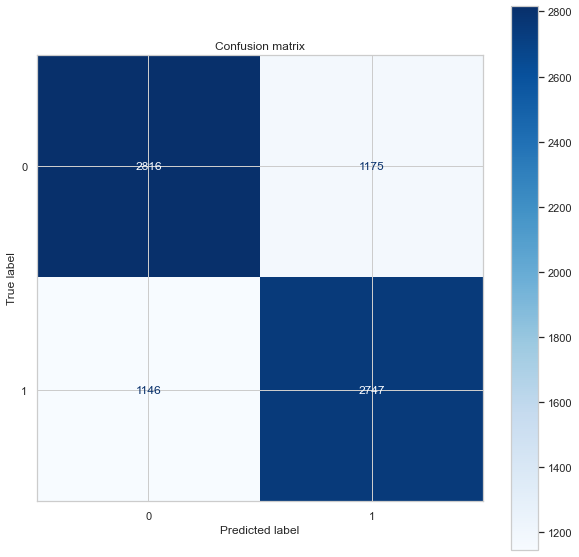

In [1214]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(lrapp, X_test, y_test, cmap='Blues',
                      labels=y_hlrw.unique(), values_format='.0f',
                      normalize=None, xticks_rotation= 'horizontal',ax=ax)
plt.title('Confusion matrix')
plt.show()